In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

**Number of rows: 50,000**
### Columns descriptions:

| Column Name            | Description                                                                                                                | Data Type | Feature Type |
|------------------------|----------------------------------------------------------------------------------------------------------------------------|-----------|--------------|
| **item_id**            | Ad id.                                                                                                                     | object    | Categorical  |
| **user_id**            | User id.                                                                                                                   | object    | Categorical  |
| **region**             | Ad region.                                                                                                                 | object    | Categorical  |
| **city**               | Ad city.                                                                                                                   | object    | Categorical  |
| **parent_category_name** | Top level ad category as classified by Avito's ad model.                                                                   | object    | Categorical  |
| **category_name**      | Fine grain ad category as classified by Avito's ad model.                                                                  | object    | Categorical  |
| **param_1**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **param_2**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **param_3**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **title**              | Ad title.                                                                                                                  | object    | Text         |
| **description**        | Ad description.                                                                                                            | object    | Text         |
| **price**              | Ad price.                                                                                                                  | float64   | Numerical    |
| **item_seq_number**    | Ad sequential number for user.                                                                                             | int64     | Numerical    |
| **activation_date**    | Date ad was placed.                                                                                                        | date      | Datetime     |
| **user_type**          | User type.                                                                                                                 | object    | Categorical  |
| **image**              | Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.                                              | object    | Categorical  |
| **image_top_1**        | Avito's classification code for the image.                                                                                 | int       | Categorical  |
| **deal_probability**   | The target variable. This is the likelihood that an ad actually sold something. It can be any float from zero to one.      | float64   | Numerical    |

Avito computes deal probability based on a combination of how many people view the ad and how many people click the button.


# Load the dataset and display basic information

In [209]:
data = pd.read_csv('../data/samples/sample.csv')

In [96]:
data.head()

item_id       user_id                region              city  \
0  37caa97a8562  5484477d3189   Кемеровская область       Новокузнецк   
1  85119a2796ec  46e13871e15c             Татарстан  Набережные Челны   
2  fbd0db66bb86  b1c2c89ecd02    Ростовская область    Ростов-на-Дону   
3  a91f1779fc3f  65bf5e16c85b  Свердловская область      Екатеринбург   
4  83db89fe1827  e0b4ad32b616    Краснодарский край     Варениковская   

  parent_category_name           category_name                   param_1  \
0         Недвижимость    Дома, дачи, коттеджи                    Продам   
1            Транспорт              Автомобили                С пробегом   
2      Для дома и дачи       Мебель и интерьер  Кровати, диваны и кресла   
3          Личные вещи  Детская одежда и обувь             Для мальчиков   
4               Услуги       Предложение услуг      Курьерские поручения   

  param_2 param_3                          title  \
0    Дача     NaN   Дача 75 м² на участке 8 сот.   
1    Opel   Astra               Opel Astra, 2008   
2     NaN     NaN                          Диван   
3   Обувь      25  Ботинки Том.м мембрана 25 р-р   
4     NaN     NaN               Доставка букетов   

                                         description      price  \
0  Замечательная дача! Свежий дом и баня.  Все ст...  3500000.0   
1  Автомобиль в хорошем техническом состоянии, се...   315000.0   
2                                                NaN     3000.0   
3  Ботинки Том.м мембрана размер 25. На холодную ...      500.0   
4                     Любой букет 💐 доставим подарим      500.0   

   item_seq_number activation_date user_type  \
0              906      2017-03-17      Shop   
1               24      2017-03-17   Private   
2                3      2017-03-28   Private   
3               13      2017-03-21   Private   
4              308      2017-03-25   Company   

                                               image  image_top_1  \
0  9fdf936006ed83f6fe42effecfa046495cf640fca430d2...        948.0   
1  3d7b1a4a4c24a23452cb1079d947080b530e0f56f637fc...       1132.0   
2  d049cf9af1cd96426cc5c27afca408210f4f82543689bc...       1432.0   
3  822926bc330eb36899870c496fc77780ff602365d49f35...         47.0   
4                                                NaN          NaN   

   deal_probability  
0           0.00000  
1           0.00000  
2           0.22491  
3           0.00000  
4           0.37500

Data information

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   item_id               100000 non-null  object 
 1   user_id               100000 non-null  object 
 2   region                100000 non-null  object 
 3   city                  100000 non-null  object 
 4   parent_category_name  100000 non-null  object 
 5   category_name         100000 non-null  object 
 6   param_1               95892 non-null   object 
 7   param_2               56597 non-null   object 
 8   param_3               42475 non-null   object 
 9   title                 100000 non-null  object 
 10  description           92218 non-null   object 
 11  price                 94285 non-null   float64
 12  item_seq_number       100000 non-null  int64  
 13  activation_date       100000 non-null  object 
 14  user_type             100000 non-null  object 
 15  i

There are 100,000 rows and 17 columns in the dataset. However, we will not use image column in this project, as it would require loading all 50k images and working with them, so we will drop this column.

In [98]:
data.drop('image', axis=1, inplace=True)

We can also see that there are some missing values in the dataset. We will handle them later. Now, let's display information about missing values.

In [99]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')

Duplicates in the dataset: 0


There are no duplicates in the dataset.

Finally, we see, that activation_date column type is incorrect.

In [100]:
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Exploratory Data Analysis

We will start with univariate analysis of features in the dataset.

### Categorical Features

#### Parent Category Name

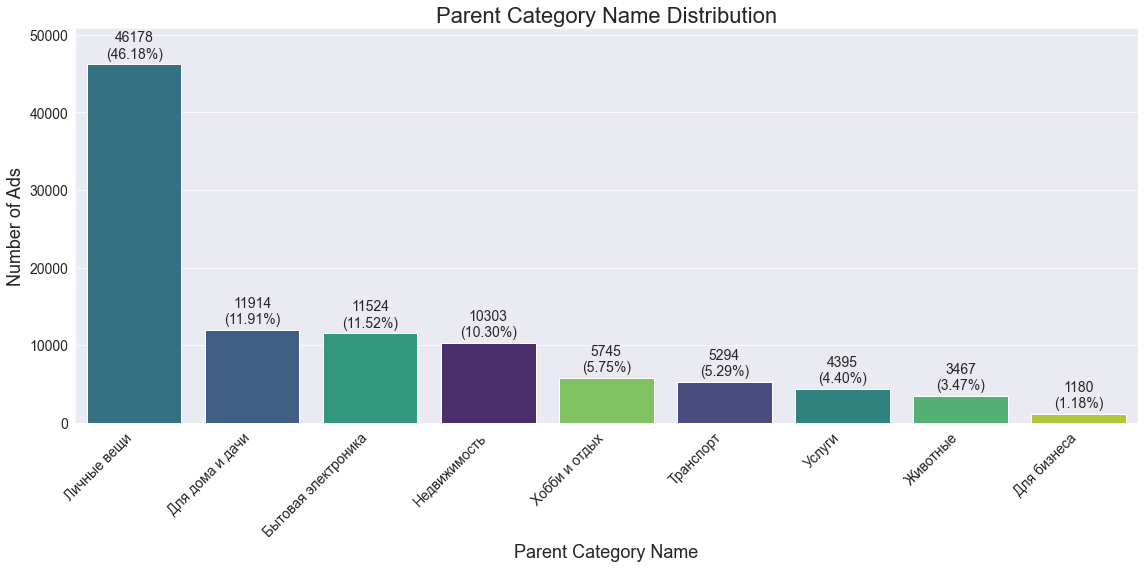

In [8]:
def plot_categorical_feature(data, column, title, xlabel, ylabel, figsize=(16, 8), only_percentage=False, format_percentage='{:.2f}%', rotation=45, topk=None, order=None):
    plt.figure(figsize=figsize)
    count = data[column].value_counts()
    if topk is not None:
        count = count.head(topk)
    order = count.index if order is None else order
    sns.countplot(x=column, data=data, order=order, palette='viridis', legend=False, hue=data[column])
    plt.title(title, fontsize=22)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    if rotation is not None:
        plt.xticks(fontsize=14, rotation=rotation, ha='right')
    else:
        plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, max(count) * 1.1)

    for i in range(len(order)):
        v = order[i]
        value = count.loc[v] if v in count.index else 0
        percentage = (value / len(data)) * 100
        if only_percentage:
            plt.text(i, value + max(count) * 0.01, format_percentage.format(percentage), ha='center', va='bottom', fontsize=14)
        else:
            plt.text(i, value + max(count) * 0.01, f'{value}\n({format_percentage.format(percentage)})', ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    plt.show()

plot_categorical_feature(data, 'parent_category_name', 'Parent Category Name Distribution', 'Parent Category Name', 'Number of Ads')

We can see that the most common parent category is "Personal belongings," followed by "For the home and garden" and "Consumer electronics.".
The distribution of ads across parent categories is not uniform, with some categories having significantly more ads than others, especially "Personal belongings", which contains almost half of the ads in the dataset.
There are 9 unique parent categories in the dataset.

#### Category Name

In [43]:
print(f'Number of unique categories: {data["category_name"].nunique()}')

Number of unique categories: 47


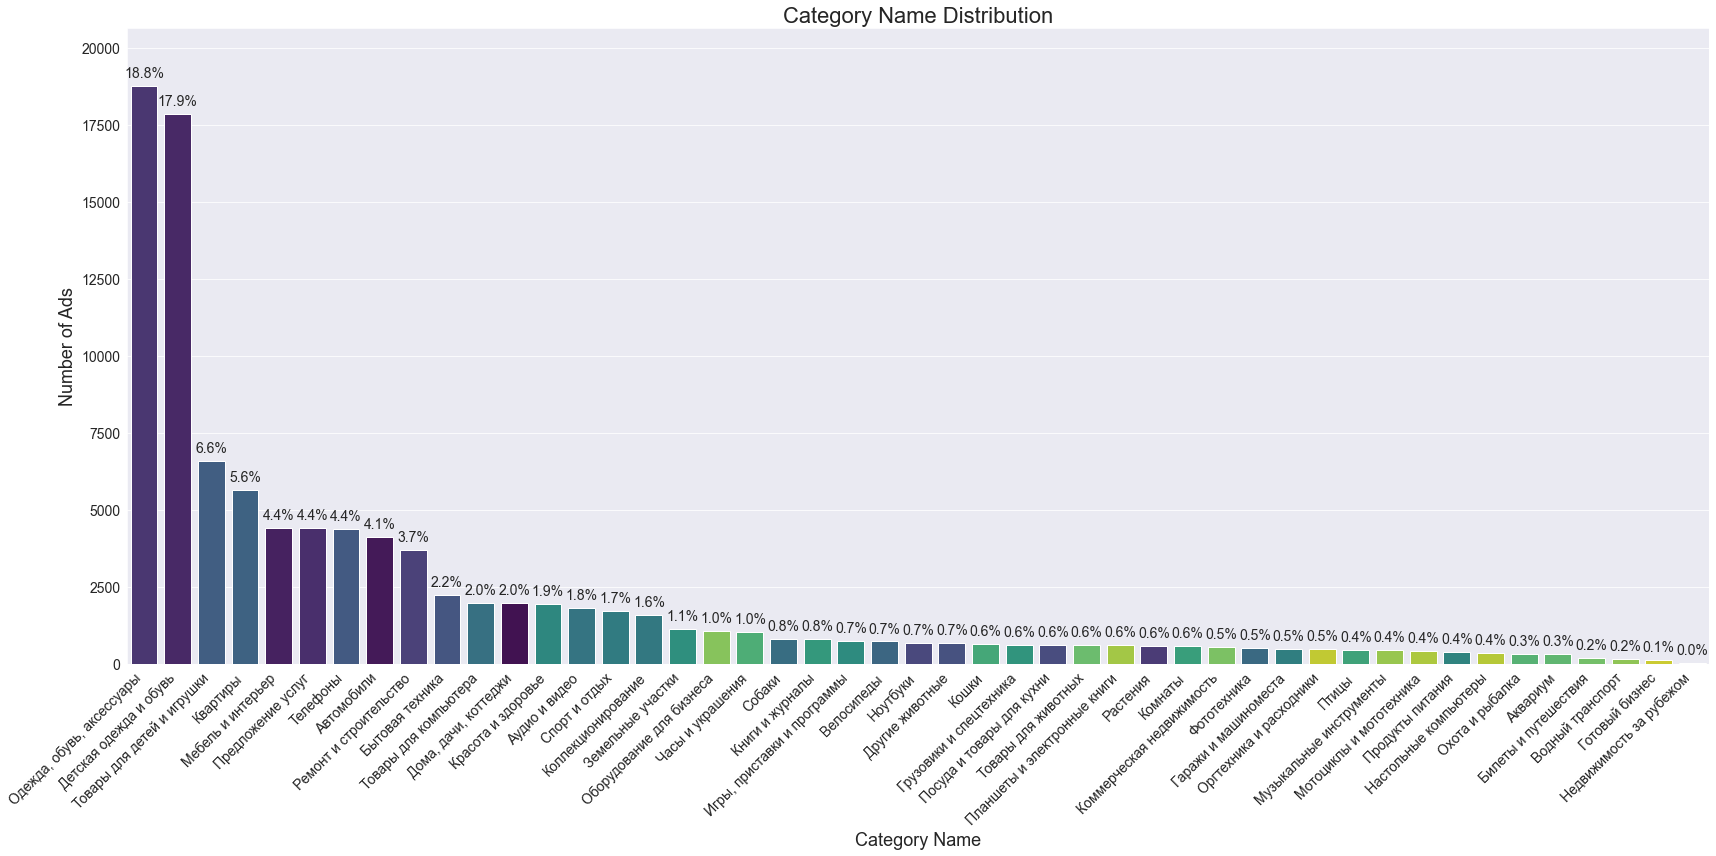

In [44]:
plot_categorical_feature(data, 'category_name', 'Category Name Distribution', 'Category Name', 'Number of Ads', figsize=(24, 12), only_percentage=True, format_percentage='{:.1f}%')

There are 47 unique categories in the dataset. The most common category is "Clothing, shoes, and accessories," followed by "Children's clothing and shoes".
The distribution of ads across categories is not uniform, with first 2 categories, related to cloths, having significantly more ads than others.
Since a lot of parent categories have less then 1% of ads, we will can combine them into one category called "Other", to reduce the dimensionality of the dataset after encoding.

In [111]:
top_categories = data['category_name'].value_counts(normalize=True).cumsum()
top_categories = top_categories[top_categories <= 0.75].index
top_categories, len(top_categories)

(Index(['Одежда, обувь, аксессуары', 'Детская одежда и обувь',
        'Товары для детей и игрушки', 'Квартиры', 'Мебель и интерьер',
        'Предложение услуг', 'Телефоны', 'Автомобили', 'Ремонт и строительство',
        'Бытовая техника', 'Товары для компьютера'],
       dtype='object', name='category_name'),
 11)

#### User Type

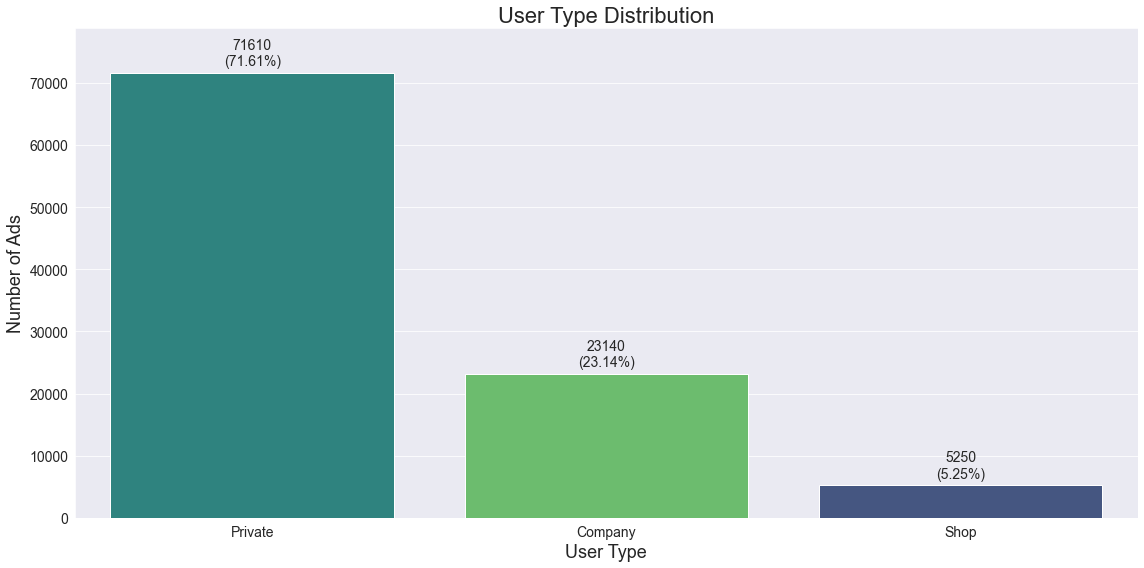

In [45]:
plot_categorical_feature(data, 'user_type', 'User Type Distribution', 'User Type', 'Number of Ads', rotation=None)

The most common user type is "Private", followed by "Company" and "Shop". The distribution of user types is not uniform, with private users having significantly more ads than companies and shops.

#### Region and City

In [46]:
print(f'Number of unique regions: {data["region"].nunique()}')
print(f'Number of unique cities: {data["city"].nunique()}')

Number of unique regions: 28
Number of unique cities: 1239


There are 28 unique regions and 1239 unique cities in the dataset. We will not plot cities, as there are too many of them.

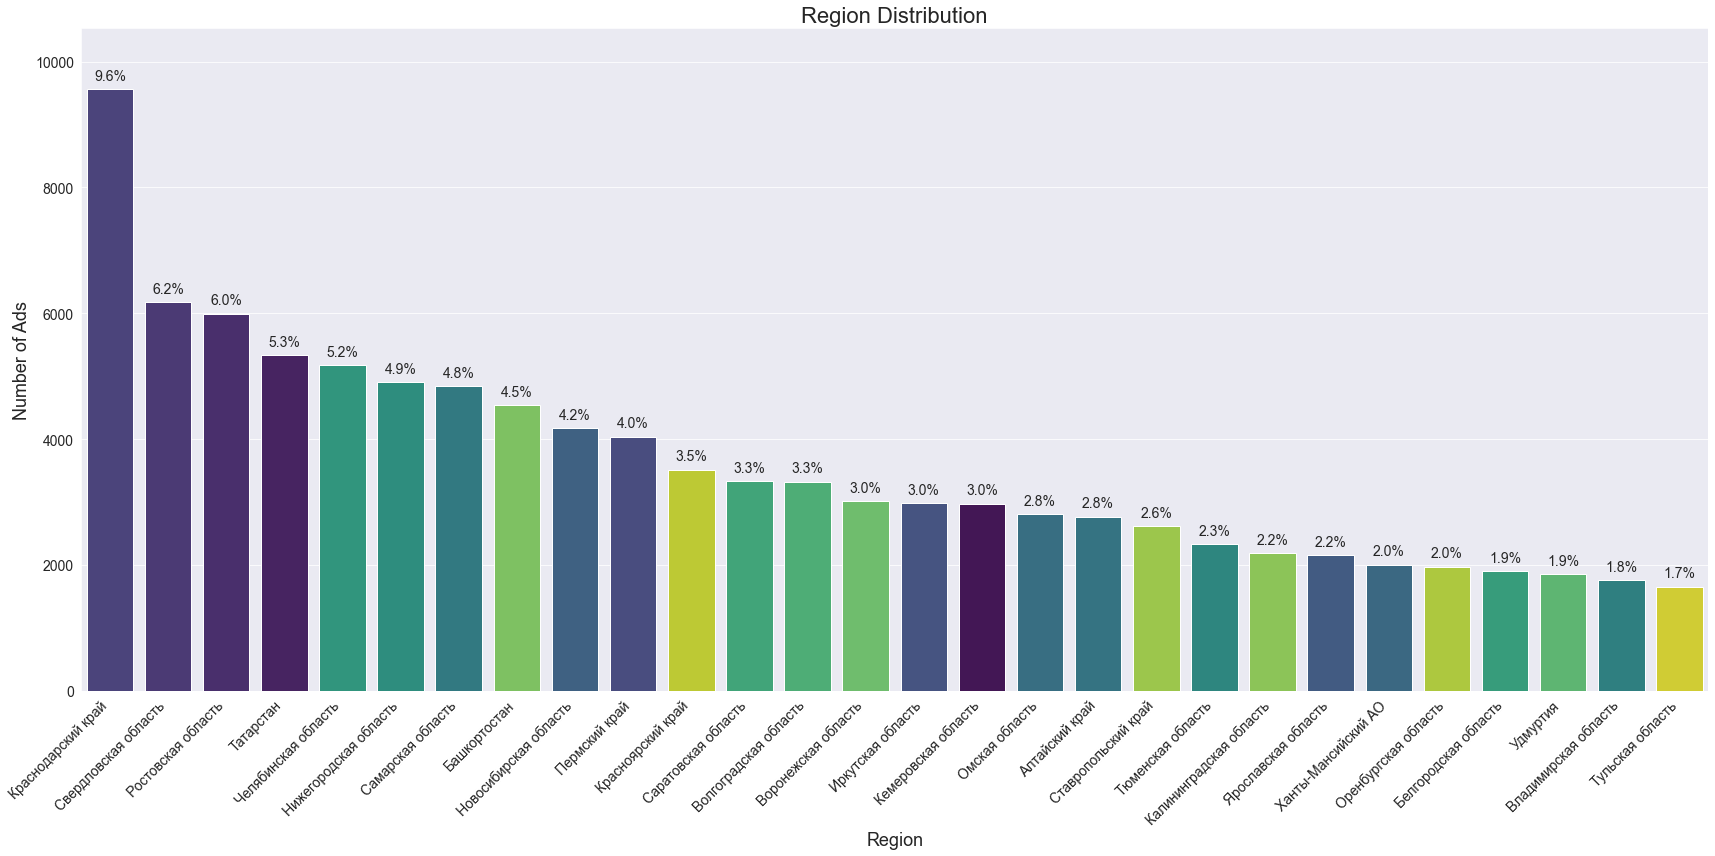

In [47]:
plot_categorical_feature(data, 'region', 'Region Distribution', 'Region', 'Number of Ads', figsize=(24, 12), only_percentage=True, format_percentage='{:.1f}%')

The most common region is "Krasnodar region", followed by "Sverdlovsk region" and "Rostov region".
The distribution of ads across regions is not uniform, with some regions having significantly more ads than others, especially "Krasnodar region", however, the difference is not very significant. Because of that, we will not combine any regions into one category.

Let's plot the distribution of the top 20 cities.

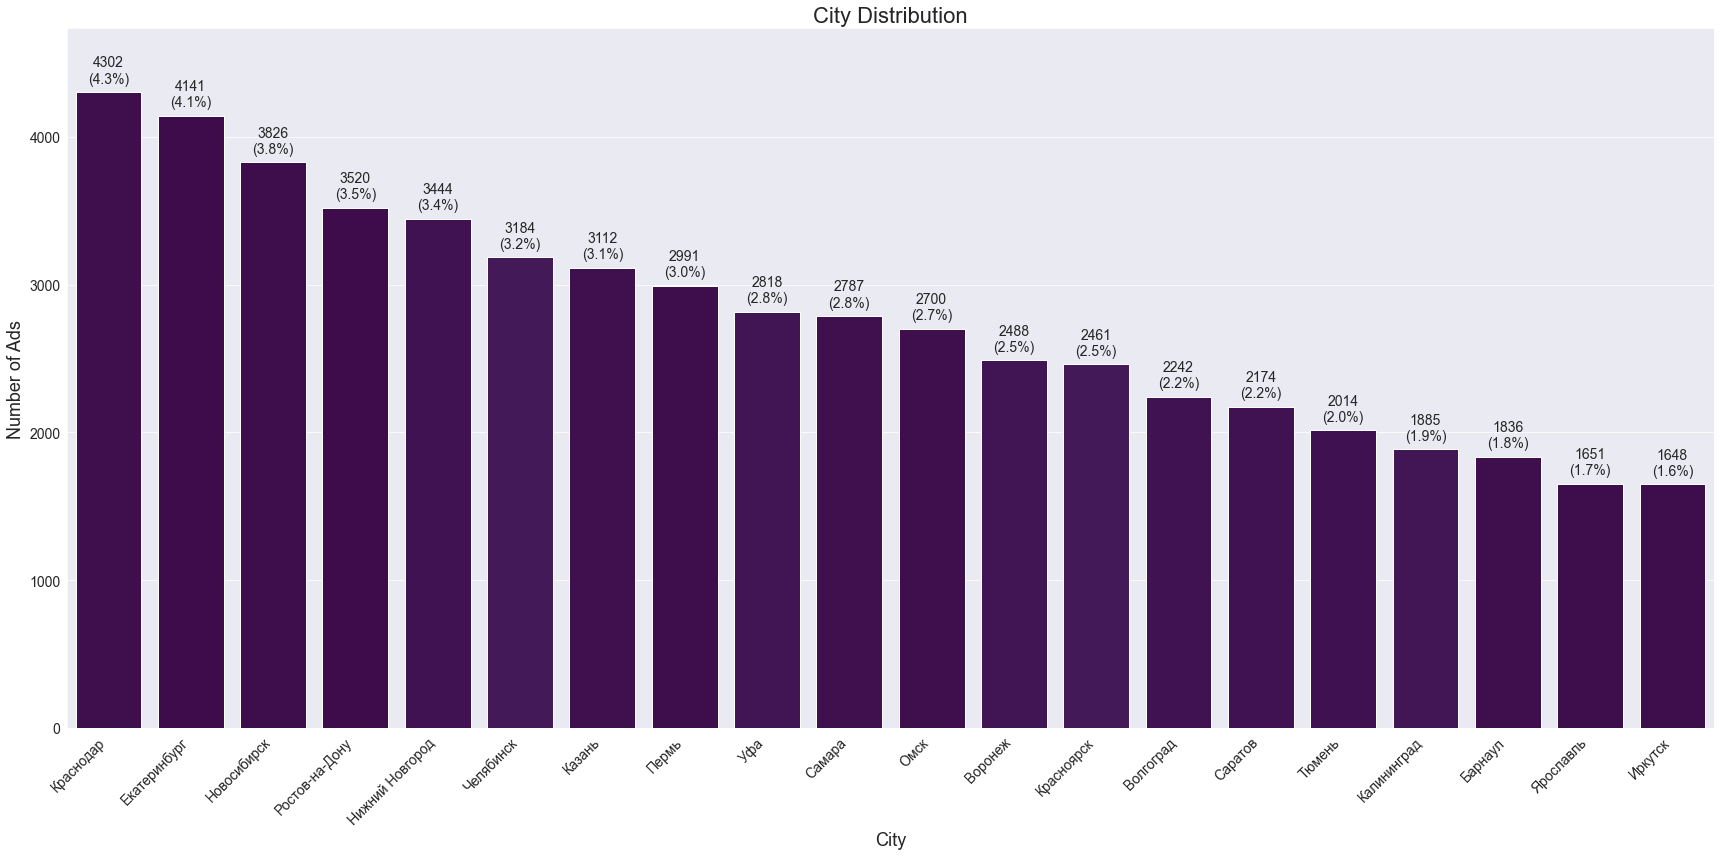

In [48]:
plot_categorical_feature(data, 'city', 'City Distribution', 'City', 'Number of Ads', figsize=(24, 12), format_percentage='{:.1f}%', topk=20)

The most common city is "Krasnodar", followed by "Ekaterinburg" and "Novosibirsk".
To reduce the dimensionality of the dataset after encoding, we can take only first cities, that have more then 75% of ads, and combine the rest into one category called "Other".

In [49]:
top_cities = data['city'].value_counts(normalize=True).cumsum()
top_cities = top_cities[top_cities <= 0.75].index
top_cities, len(top_cities)

(Index(['Краснодар', 'Екатеринбург', 'Новосибирск', 'Ростов-на-Дону',
        'Нижний Новгород', 'Челябинск', 'Казань', 'Пермь', 'Уфа', 'Самара',
        'Омск', 'Воронеж', 'Красноярск', 'Волгоград', 'Саратов', 'Тюмень',
        'Калининград', 'Барнаул', 'Ярославль', 'Иркутск', 'Оренбург', 'Сочи',
        'Ижевск', 'Тольятти', 'Кемерово', 'Белгород', 'Тула', 'Ставрополь',
        'Набережные Челны', 'Новокузнецк', 'Владимир', 'Сургут', 'Магнитогорск',
        'Нижний Тагил', 'Таганрог', 'Новороссийск', 'Волжский', 'Стерлитамак',
        'Дзержинск', 'Ангарск', 'Энгельс', 'Бийск', 'Анапа'],
       dtype='object', name='city'),
 43)

#### Param 1, Param 2, and Param 3

In [50]:
print(f'Number of unique values in param_1: {data["param_1"].nunique()}')
print(f'Number of unique values in param_2: {data["param_2"].nunique()}')
print(f'Number of unique values in param_3: {data["param_3"].nunique()}')

Number of unique values in param_1: 333
Number of unique values in param_2: 228
Number of unique values in param_3: 609


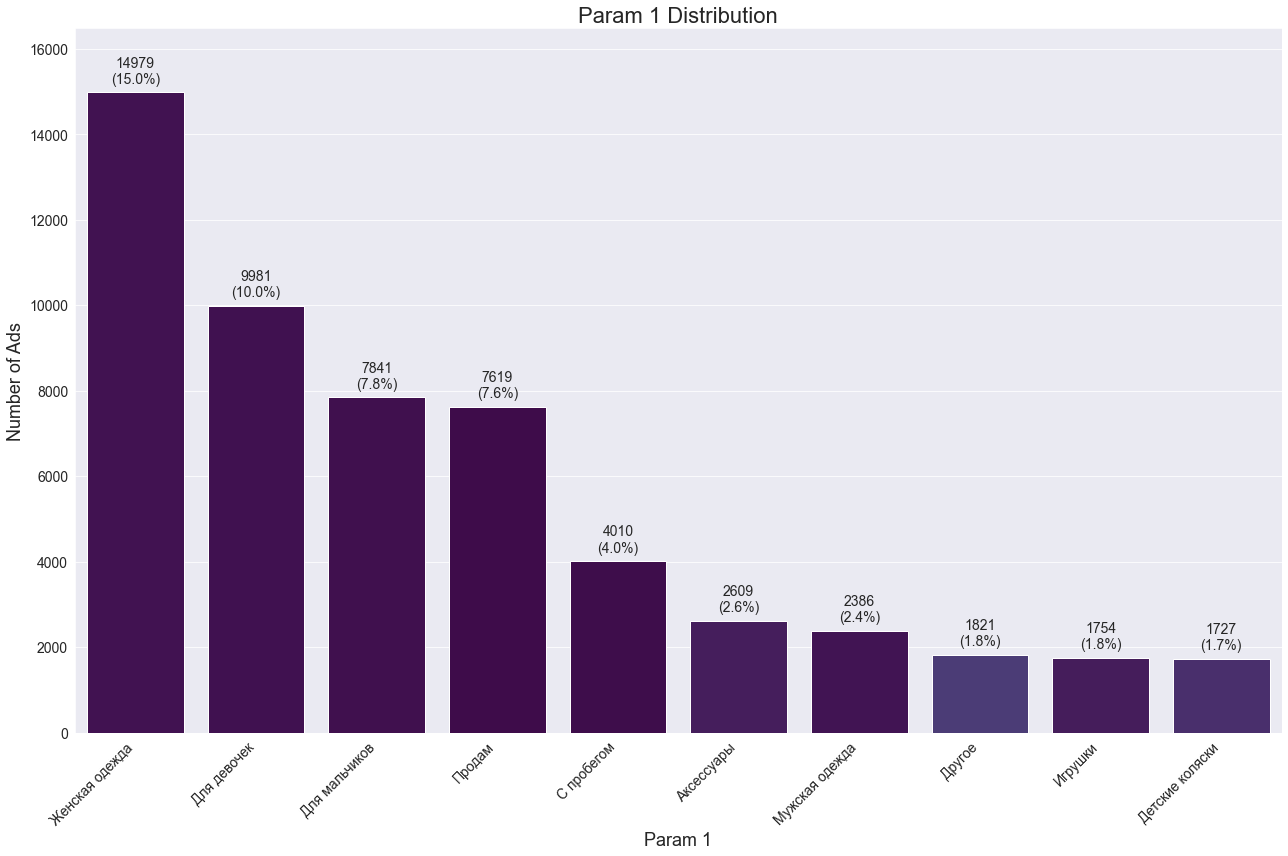

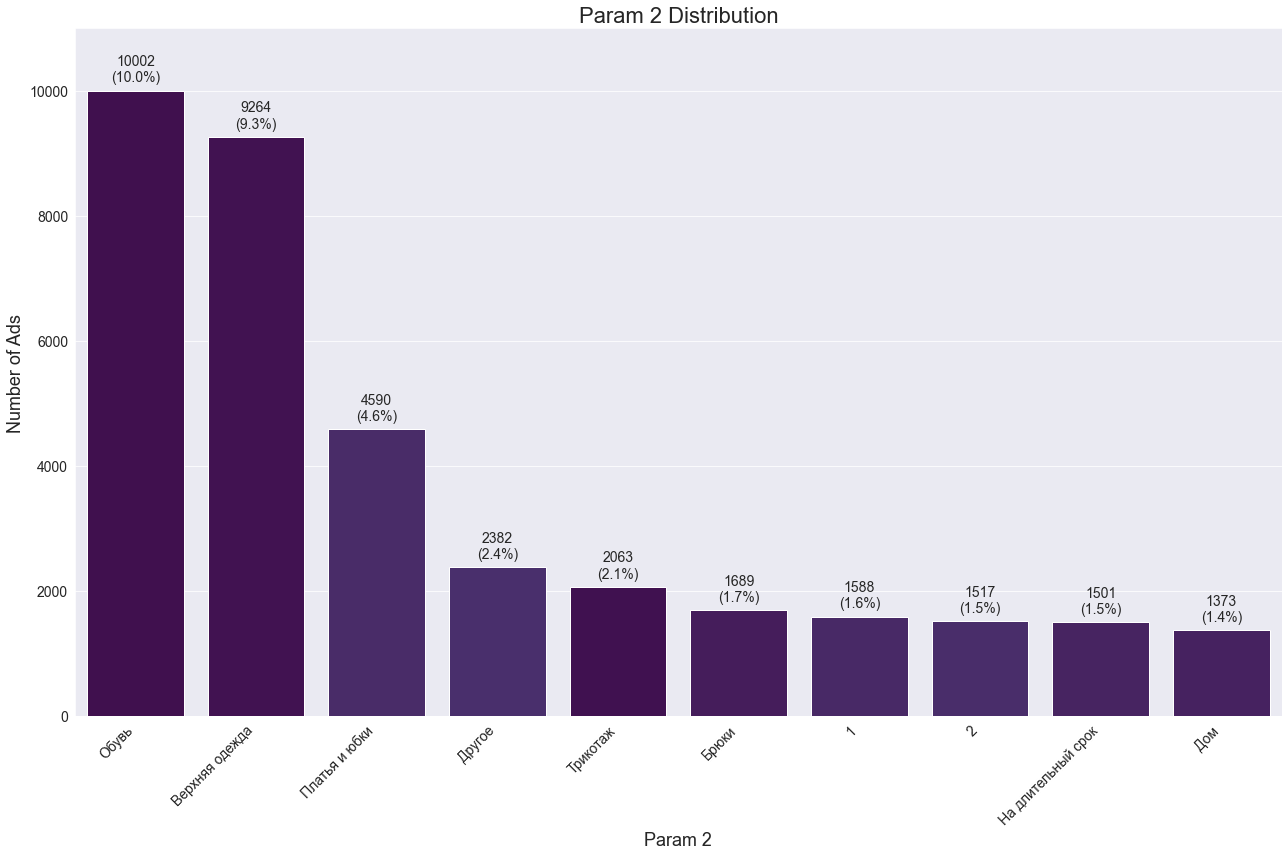

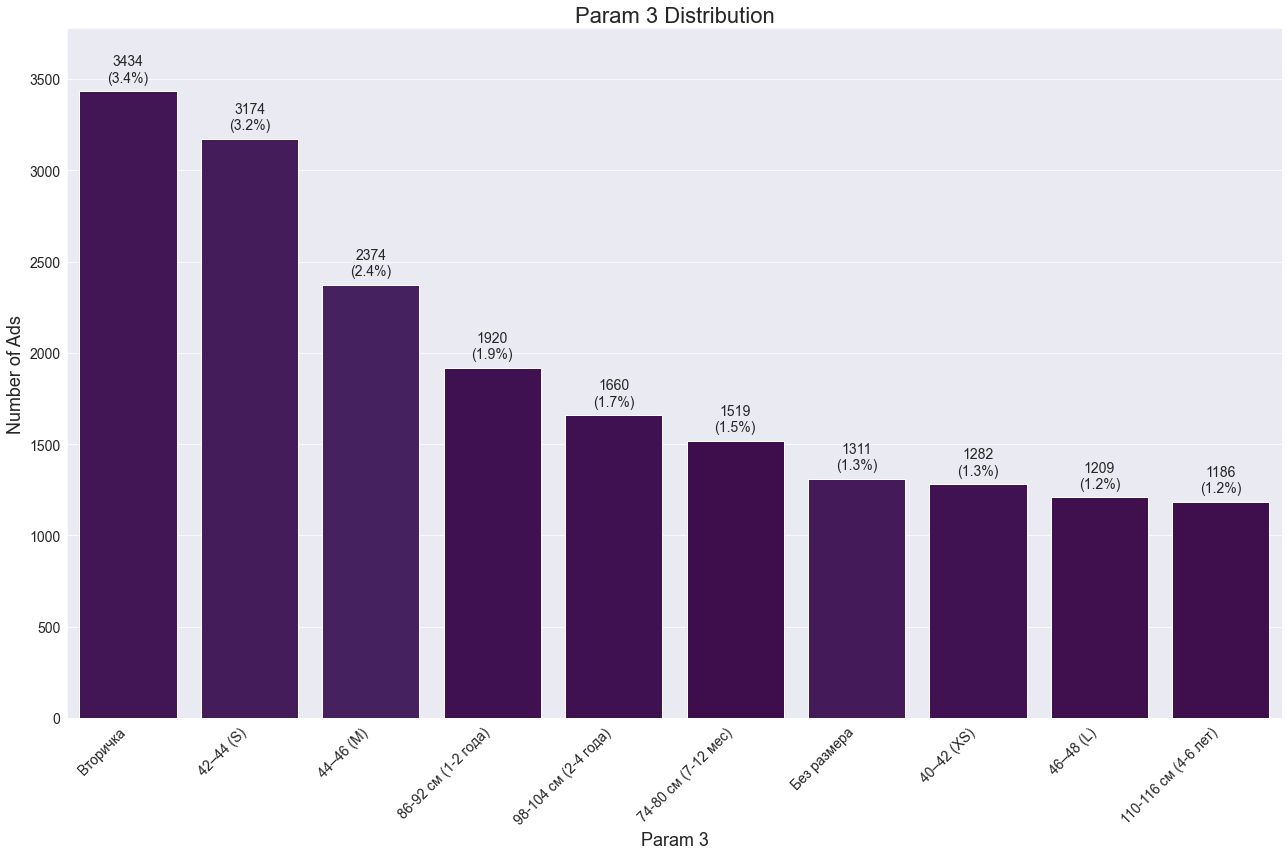

In [51]:
plot_categorical_feature(data, 'param_1', 'Param 1 Distribution', 'Param 1', 'Number of Ads', figsize=(18, 12), format_percentage='{:.1f}%', topk=10)
plot_categorical_feature(data, 'param_2', 'Param 2 Distribution', 'Param 2', 'Number of Ads', figsize=(18, 12), format_percentage='{:.1f}%', topk=10)
plot_categorical_feature(data, 'param_3', 'Param 3 Distribution', 'Param 3', 'Number of Ads', figsize=(18, 12), format_percentage='{:.1f}%', topk=10)

There are a large number of unique values in `param_1`, `param_2`, and `param_3`. `param_2` seems to be lower level specification of `param_1`, and `param_3` seems to be lower level specification of `param_2`. Again, since there are too many unique values, we can combine all values that have have less then 75% of ads into one category called "Other".

In [52]:
top_param_1 = data['param_1'].value_counts(normalize=True).cumsum()
top_param_1 = top_param_1[top_param_1 <= 0.75].index
top_param_1, len(top_param_1)

(Index(['Женская одежда', 'Для девочек', 'Для мальчиков', 'Продам',
        'С пробегом', 'Аксессуары', 'Мужская одежда', 'Другое', 'Игрушки',
        'Детские коляски', 'Сдам', 'Ремонт, строительство', 'Стройматериалы',
        'iPhone', 'Кровати, диваны и кресла', 'Инструменты', 'Для кухни',
        'Комплектующие', 'Детская мебель', 'Шкафы и комоды',
        'Приборы и аксессуары', 'Для дома', 'Транспорт, перевозки',
        'Товары для кормления', 'Сниму', 'Телевизоры и проекторы', 'Samsung',
        'Книги', 'Предметы интерьера, искусство'],
       dtype='object', name='param_1'),
 29)

In [53]:
top_param_2 = data['param_2'].value_counts(normalize=True).cumsum()
top_param_2 = top_param_2[top_param_2 <= 0.75].index
top_param_2, len(top_param_2)

(Index(['Обувь', 'Верхняя одежда', 'Платья и юбки', 'Другое', 'Трикотаж',
        'Брюки', '1', '2', 'На длительный срок', 'Дом', 'ВАЗ (LADA)',
        'Комбинезоны и боди', '3', 'Поселений (ИЖС)', 'Пиджаки и костюмы',
        'Джинсы', 'Рубашки и блузки'],
       dtype='object', name='param_2'),
 17)

In [54]:
top_param_3 = data['param_3'].value_counts(normalize=True).cumsum()
top_param_3 = top_param_3[top_param_3 <= 0.75].index
top_param_3, len(top_param_3)

(Index(['Вторичка', '42–44 (S)', '44–46 (M)', '86-92 см (1-2 года)',
        '98-104 см (2-4 года)', '74-80 см (7-12 мес)', 'Без размера',
        '40–42 (XS)', '46–48 (L)', '110-116 см (4-6 лет)', '62-68 см (2-6 мес)',
        '38', '37', '122-128 см (6-8 лет)', '36', '1', 'Новостройка', '39',
        '48–50 (XL)', '146-152 см (10-12 лет)', '> 50 (XXL)',
        '134-140 см (8-10 лет)', '23', '22', '25', '26', '21', '2', '< 19',
        '24'],
       dtype='object', name='param_3'),
 30)

### Image Top 1

Image Top 1 is Avito's classification code for the image, that seems to be a categorical feature, and is based on internal Avito's classification algorithm. Let's plot the distribution of this feature.

In [55]:
print(f'Number of unique values in image_top_1: {data["image_top_1"].nunique()}')

Number of unique values in image_top_1: 2920


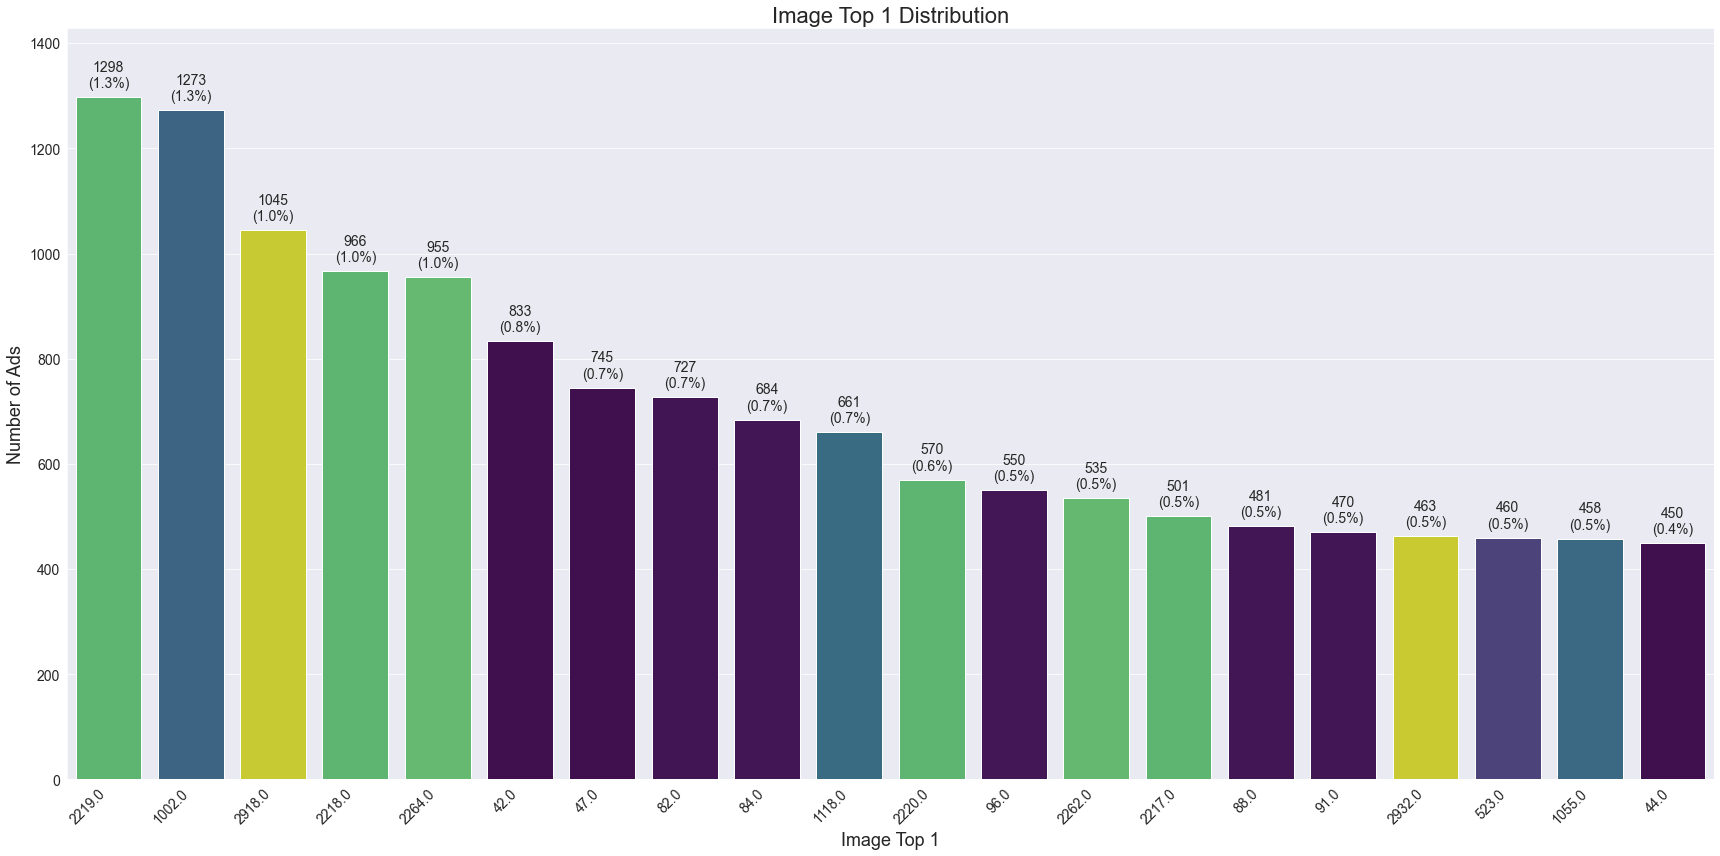

In [56]:
plot_categorical_feature(data, 'image_top_1', 'Image Top 1 Distribution', 'Image Top 1', 'Number of Ads', figsize=(24, 12), format_percentage='{:.1f}%', topk=20)

Again, there are too many unique values in this feature, so we can try to combine all values that have less then 75% of ads into one category called "Other".

In [57]:
top_image_top_1 = data['image_top_1'].value_counts(normalize=True).cumsum()
top_image_top_1 = top_image_top_1[top_image_top_1 <= 0.75].index
top_image_top_1, len(top_image_top_1)

(Index([2219.0, 1002.0, 2918.0, 2218.0, 2264.0,   42.0,   47.0,   82.0,   84.0,
        1118.0,
        ...
         557.0, 2858.0,  148.0, 1323.0,  116.0, 2514.0, 2487.0, 1291.0, 2866.0,
         919.0],
       dtype='float64', name='image_top_1', length=615),
 615)

However, even after combining all values that are present in less then 75% of ads, there are still 615 unique values in this feature, so let's try to combine all values that are present in less then 50% of ads into one category called "Other".

In [58]:
top_image_top_1 = data['image_top_1'].value_counts(normalize=True).cumsum()
top_image_top_1 = top_image_top_1[top_image_top_1 <= 0.50].index
top_image_top_1, len(top_image_top_1)

(Index([2219.0, 1002.0, 2918.0, 2218.0, 2264.0,   42.0,   47.0,   82.0,   84.0,
        1118.0,
        ...
        1106.0, 2770.0,  410.0, 2275.0, 2263.0, 2325.0, 1004.0,  377.0,   92.0,
        2860.0],
       dtype='float64', name='image_top_1', length=187),
 187)

### Numerical Features

#### Price

Let's assess the distribution of the price feature.

In [60]:
data['price'].describe().apply(lambda x: format(x, 'f'))

count          94285.000000
mean         1097216.965700
std        258926095.265934
min                0.000000
25%              500.000000
50%             1300.000000
75%             7000.000000
max      79501011850.000000
Name: price, dtype: object

First of all, it seems that there are very large outliers in the price feature: the maximum price is more then 79 billion, while the 75th percentile is only 7000. Let's plot the distribution of the price feature in log scale.

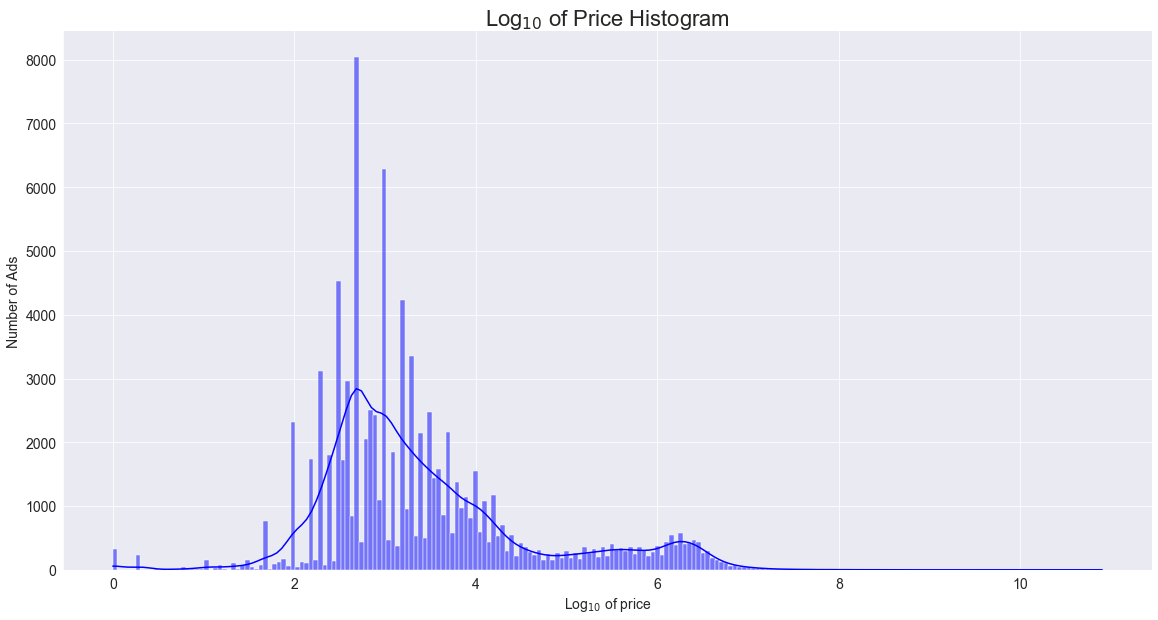

In [85]:
price = data["price"].values

sns.displot(np.log10(price + 1), kde=True, height=8, aspect=2, color='blue')
plt.xlabel('Log$_{10}$ of price', fontsize=14)
plt.ylabel('Number of Ads', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Log$_{10}$ of Price Histogram", fontsize=22)
plt.show()

- The histogram shows a peak around the log10 value of 2 to 4. This corresponds to a price range of approximately 100 to 10,000 rubles.
- The distribution has a long tail extending towards higher log values, indicating a smaller number of high-priced ads.
- There is a small but consistent number of ads with a price between 4 and 6.5 on the log scale, corresponding to a price range of 10,000 to 3,000,000 rubles. After that, the number of ads decreases significantly.

#### Item Seq Number

Let's assess the distribution of the item_seq_number feature. This feature represents the ad sequential number for the user, which could indicate the order in which the user posted the ad. We can try to verify this hypothesis by sorting the data by user_id and activation_date, taking one item from each different date and checking if the item_seq_number is increasing.

In [94]:
data_sorted = data.sort_values(['user_id', 'activation_date'])
data_sorted = data_sorted.drop_duplicates(subset=['user_id', 'activation_date'], keep='first')
# take only users with more then 1 ad
data_sorted = data_sorted[data_sorted['user_id'].duplicated(keep=False)]
data_sorted[['user_id', 'activation_date', 'item_seq_number']].head(10)

user_id activation_date  item_seq_number
8948   00051c5a5f57      2017-03-26              456
74442  00051c5a5f57      2017-03-27              459
90458  00179aa3c386      2017-03-17             2308
86206  00179aa3c386      2017-03-20             2325
38105  00179aa3c386      2017-03-23             2362
4145   00179aa3c386      2017-03-28             2385
63237  001bbfbcca4b      2017-03-16               48
70133  001bbfbcca4b      2017-03-17               49
3300   001bbfbcca4b      2017-03-27               65
95301  002fb45acb3f      2017-03-16              536

In [95]:
data_sorted_diff = data_sorted.groupby('user_id')['item_seq_number'].diff()
data_sorted_diff.describe()

count    5498.000000
mean       19.232448
std        31.761971
min         1.000000
25%         4.000000
50%         9.000000
75%        22.000000
max       761.000000
Name: item_seq_number, dtype: float64

The minimum difference between the item_seq_number for the same user on different dates is 1, which supports our hypothesis that the item_seq_number represents the order in which the user posted the ad.

Now, we can plot the distribution of the item_seq_number feature.

In [96]:
data['item_seq_number'].describe().apply(lambda x: format(x, 'f'))

count    100000.000000
mean        721.186390
std        5422.254950
min           1.000000
25%           9.000000
50%          28.000000
75%          89.000000
max      204033.000000
Name: item_seq_number, dtype: object

The item_seq_number feature has a wide range of values, from 1 to 204033. The mean value is 721 and the median is 28. The distribution has a long tail extending towards higher values.

#### Deal Probability

Finally, let's assess the distribution of the deal_probability feature, which is the target variable in this dataset.

In [98]:
data['deal_probability'].describe().apply(lambda x: format(x, 'f'))

count    100000.000000
mean          0.140226
std           0.261250
min           0.000000
25%           0.000000
50%           0.000000
75%           0.152972
max           1.000000
Name: deal_probability, dtype: object

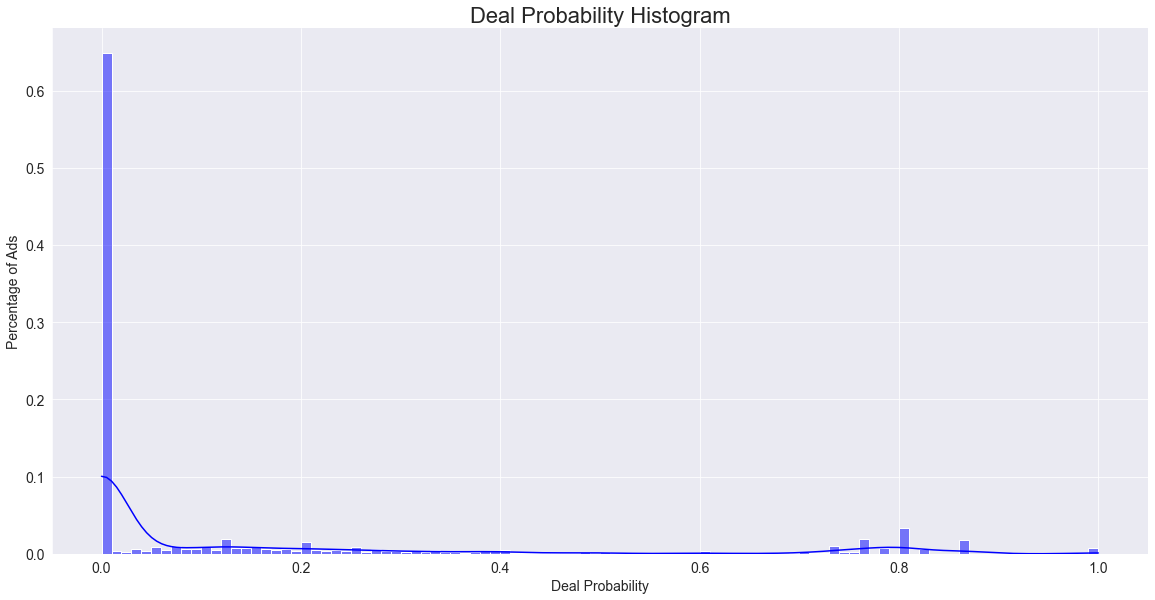

In [212]:
sns.displot(data['deal_probability'], kde=True, height=8, aspect=2, color='blue', stat='probability', bins=100)
plt.xlabel('Deal Probability', fontsize=14)
plt.ylabel('Percentage of Ads', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Deal Probability Histogram", fontsize=22)
plt.show()

In [214]:
(data['deal_probability'] < 0.05).sum() / len(data)

0.66447

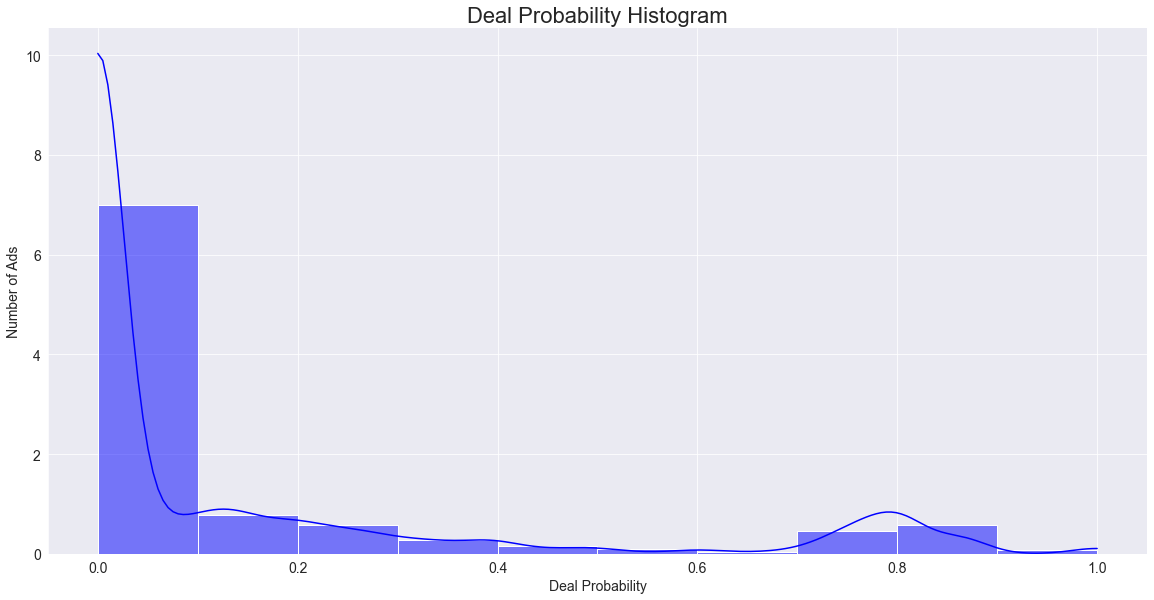

In [103]:
sns.displot(data['deal_probability'], kde=True, height=8, aspect=2, color='blue', stat='density', bins=10)
plt.xlabel('Deal Probability', fontsize=14)
plt.ylabel('Number of Ads', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Deal Probability Histogram", fontsize=22)
plt.show()

The histogram shows that the deal_probability values are distributed between 0 and 1, with the majority of ads having a deal probability close to 0. The distribution is right-skewed, with a peak around 0.0 to 0.1, corresponding to around 75% of all ads. There is also a small peak around 0.8, indicating a smaller number of ads with higher deal probabilities.

Let's consider deal_probability as a binary feature, where 1 means that the ad has a deal probability greater than 0.5, and 0 otherwise.

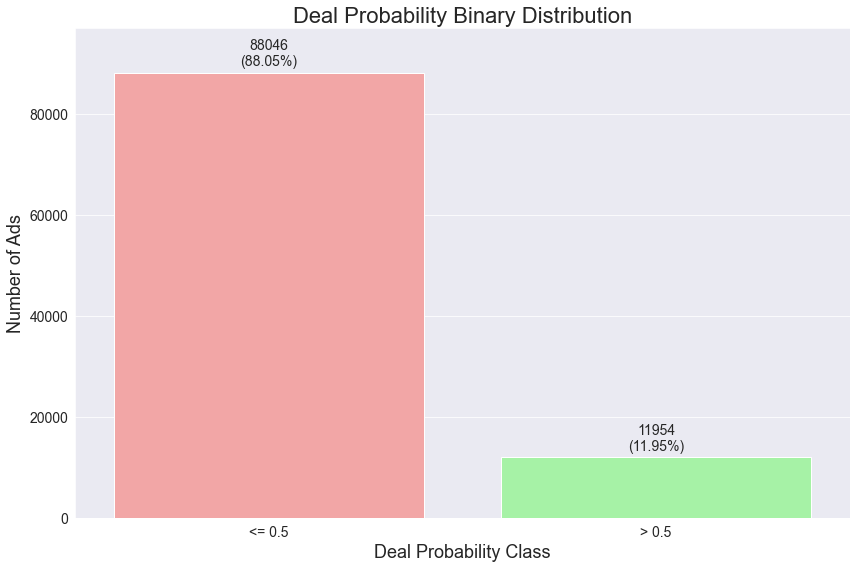

In [19]:
deal_probability_binary = (data['deal_probability'] > 0.5).astype(int)

plt.figure(figsize=(12, 8))
count = deal_probability_binary.value_counts()
sns.countplot(x=deal_probability_binary, palette=['#FF9999', '#99FF99'], hue=deal_probability_binary, legend=False)
plt.title('Deal Probability Binary Distribution', fontsize=22)
plt.xlabel('Deal Probability Class', fontsize=18)
plt.ylabel('Number of Ads', fontsize=18)
plt.xticks([0, 1], ['<= 0.5', '> 0.5'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, max(count) * 1.1)

for i in range(len(count)):
    value = count.iloc[i]
    percentage = (value / len(data)) * 100
    plt.text(i, value + max(count) * 0.01, f'{value}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

The binary deal probability distribution shows that the majority of ads have a deal probability less than or equal to 0.5 (88% of ads), while a smaller number of ads have a deal probability greater than 0.5 (12% of ads).

### Date Features

Let's analyze the distribution of ads over time.

In [23]:
data['activation_date'].describe()

count                        100000
mean     2017-03-21 12:58:32.160000
min             2017-03-15 00:00:00
25%             2017-03-18 00:00:00
50%             2017-03-21 00:00:00
75%             2017-03-25 00:00:00
max             2017-04-03 00:00:00
Name: activation_date, dtype: object

The ads in the dataset span from March 21, 2017, to April 3, 2017, covering a period of around 3 weeks.

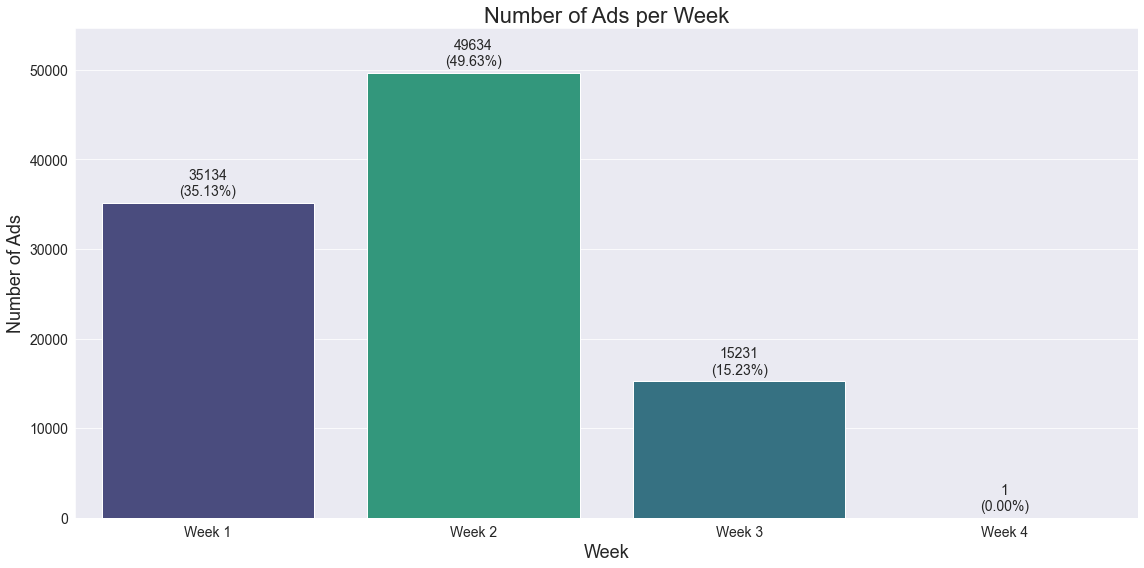

In [40]:
weekly_ads = data['activation_date'].dt.to_period('W')
weekly_ads_count = weekly_ads.value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.countplot(x=weekly_ads, palette='viridis', order=weekly_ads_count.index, hue=weekly_ads)
plt.title('Number of Ads per Week', fontsize=22)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Number of Ads', fontsize=18)
plt.xticks([i for i in range(len(weekly_ads_count))], [f'Week {i + 1}' for i in range(len(weekly_ads_count))], fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, max(weekly_ads_count) * 1.1)

for i in range(len(weekly_ads_count)):
    value = weekly_ads_count.iloc[i]
    percentage = (value / len(data)) * 100
    plt.text(i, value + max(weekly_ads_count) * 0.01, f'{value}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

It seems that on the third week, there are significantly fewer ads than on the first two weeks, however, this is a very short period of time, so we can't draw any conclusions from this. Let's plot the number of ads per day of the week and month. Also, there is a single ad in Week 4, which is an outlier, so we will remove it.

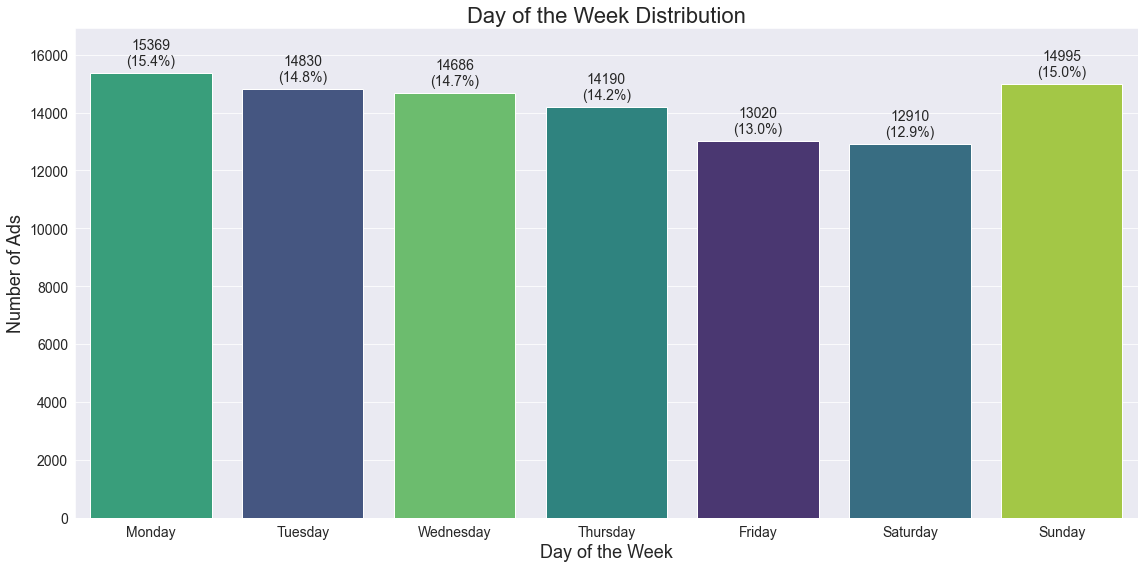

In [38]:
data_date = data.copy()
data_date['day_of_week'] = data_date['activation_date'].dt.day_name()
data_date['day_of_month'] = data_date['activation_date'].dt.day

plot_categorical_feature(data_date, 'day_of_week', 'Day of the Week Distribution', 'Day of the Week', 'Number of Ads', figsize=(16, 8), only_percentage=False, format_percentage='{:.1f}%', rotation=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

The distribution of ads across days of the week is relatively uniform, with slightly fewer ads on Friday and Saturday.

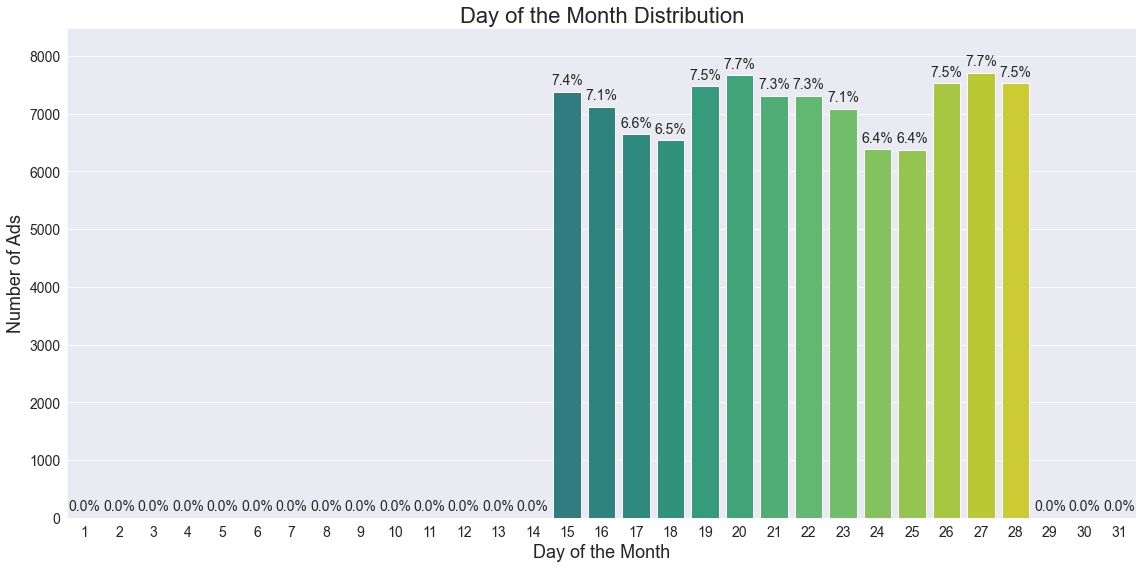

In [45]:
plot_categorical_feature(data_date, 'day_of_month', 'Day of the Month Distribution', 'Day of the Month', 'Number of Ads', figsize=(16, 8), only_percentage=True, format_percentage='{:.1f}%', rotation=None, order=[i for i in range(1, 32)])

The distribution of ads across days of the month is relatively uniform.

### Text Features

#### Title

Let's analyze the title feature, which represents the ad title. We will start by examining the length of the titles.

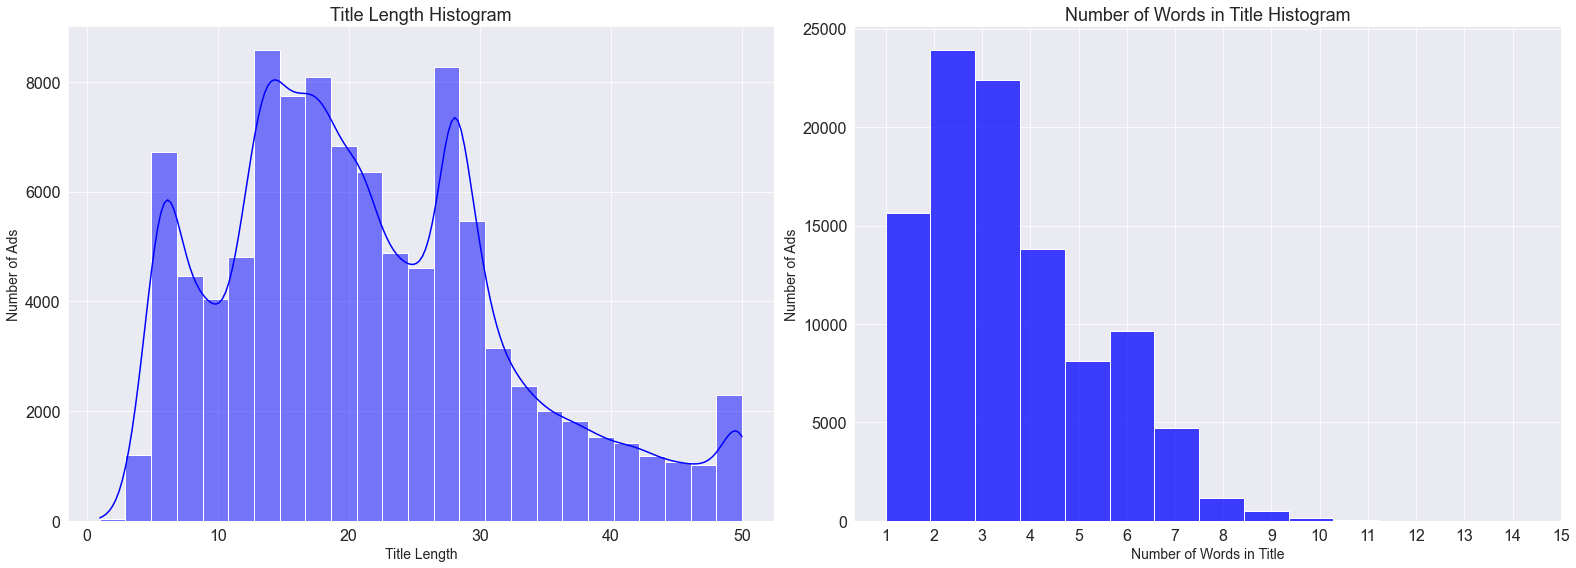

In [62]:
data_title = data['title'].str.len()
data_title_words = data['title'].str.split().apply(len)

ax, fig = plt.subplots(1, 2, figsize=(22, 8))

# set tick font size globally
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

sns.histplot(data_title, kde=True, color='blue', ax=fig[0], bins=25)
fig[0].set_xlabel('Title Length', fontsize=14)
fig[0].set_ylabel('Number of Ads', fontsize=14)
fig[0].set_title('Title Length Histogram', fontsize=18)

sns.histplot(data_title_words, kde=False, color='blue', ax=fig[1], bins=14)
fig[1].set_xlabel('Number of Words in Title', fontsize=14)
fig[1].set_ylabel('Number of Ads', fontsize=14)
fig[1].set_title('Number of Words in Title Histogram', fontsize=18)
fig[1].set_xticks([i for i in range(1, 16)])

plt.tight_layout()
plt.show()

- The title length histogram shows that the titles have a length between 0 and 50 characters, and 50 seems to be the character limit for titles.
- Majority of titles have a length between 0 and 30 characters and after that, the number of ads decreases.
- The number of words in the title histogram shows that the titles have between 1 and 15 words, with most titles having 1 to 10 words, and the majority having 1 to 5 words.

Let's analyze the most common words in the titles.

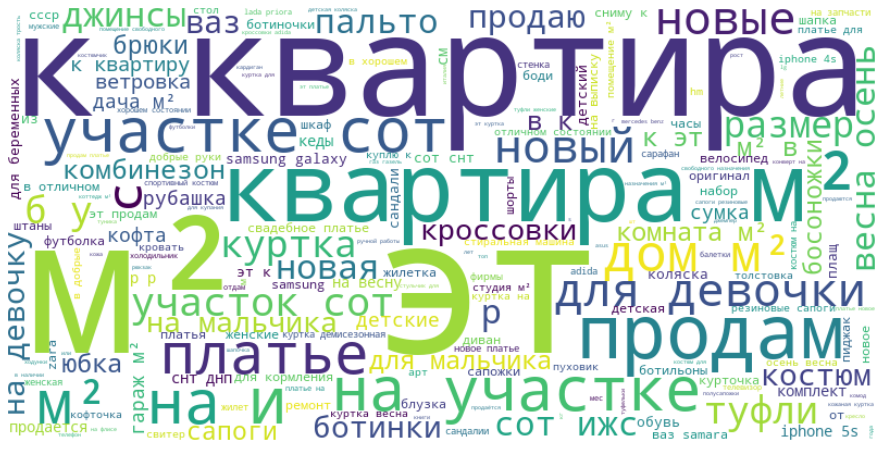

In [10]:
from wordcloud import WordCloud

def simple_preprocess(text):
    return text.lower().replace(',', ' ').replace('.', ' ').replace('!', ' ').replace('?', ' ').replace(':', ' ').replace(';', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('{', ' ').replace('}', ' ').replace('"', ' ').replace("'", ' ').replace('-', ' ').replace('_', ' ').replace('/', ' ').replace('\\', ' ').replace('|', ' ').replace('@', ' ').replace('#', ' ').replace('$', ' ').replace('%', ' ').replace('^', ' ').replace('&', ' ').replace('*', ' ').replace('~', ' ').replace('`', ' ')

title_words = ' '.join(data['title'].apply(simple_preprocess))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_words)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows the most common words in the titles. The most frequent words are "for sale", "apartment", "new", and words related to clothing.

#### Description

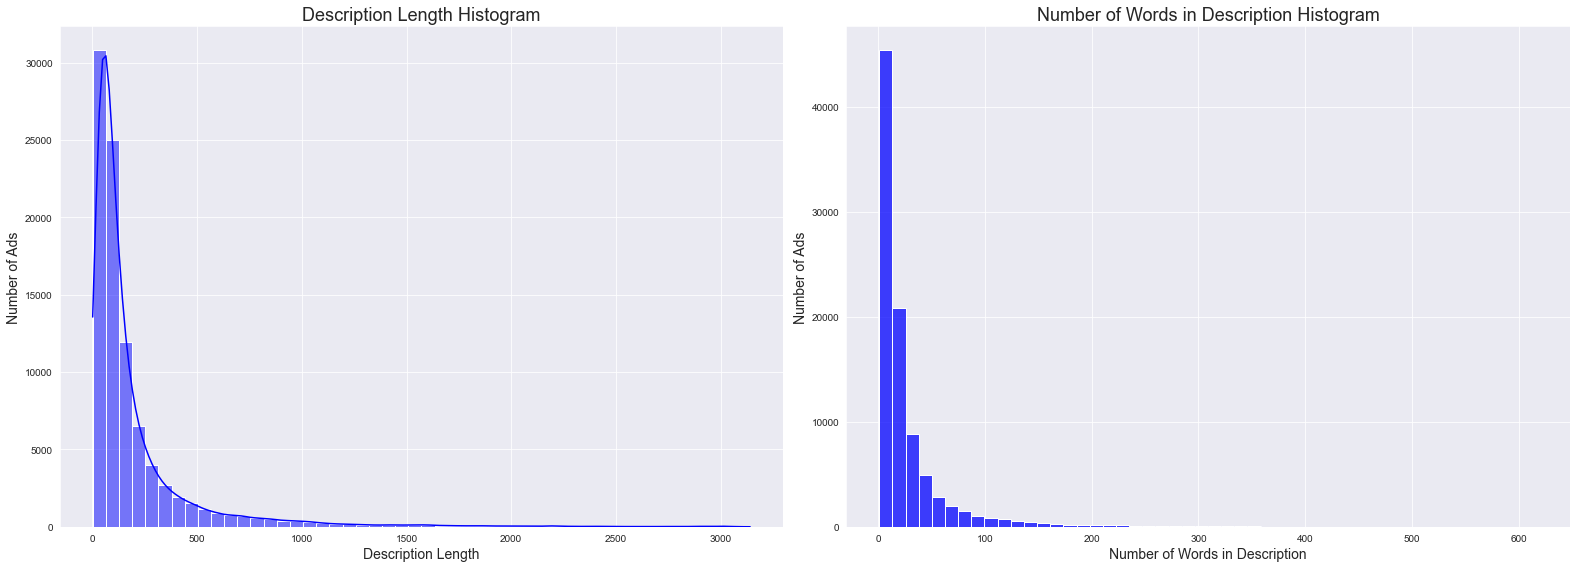

In [14]:
data_description = data['description'].dropna().str.len()
data_description_words = data['description'].dropna().str.split().apply(len)

ax, fig = plt.subplots(1, 2, figsize=(22, 8))

sns.histplot(data_description, kde=True, color='blue', ax=fig[0], bins=50)
fig[0].set_xlabel('Description Length', fontsize=14)
fig[0].set_ylabel('Number of Ads', fontsize=14)
fig[0].set_title('Description Length Histogram', fontsize=18)

sns.histplot(data_description_words, kde=False, color='blue', ax=fig[1], bins=50)
fig[1].set_xlabel('Number of Words in Description', fontsize=14)
fig[1].set_ylabel('Number of Ads', fontsize=14)
fig[1].set_title('Number of Words in Description Histogram', fontsize=18)

plt.tight_layout()
plt.show()

- Both the description length and the number of words in the description have log-normal distributions, with a most common length of around 0 to 500 characters and 0 to 100 words.

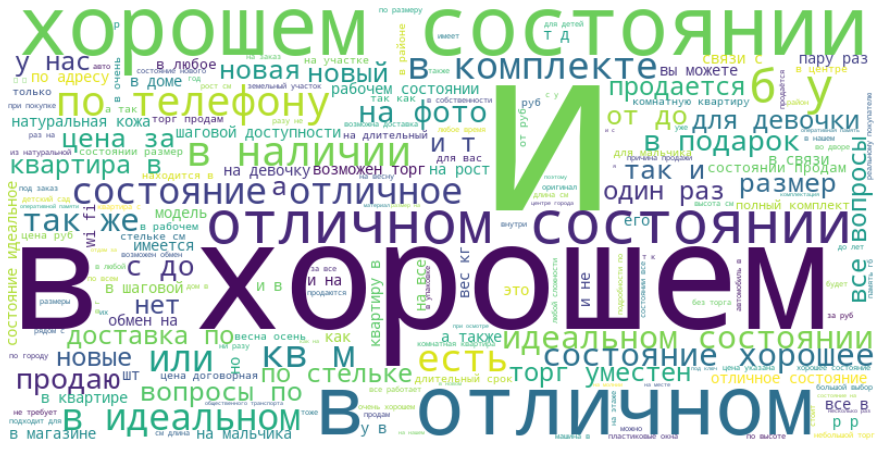

In [15]:
description_words = ' '.join(data['description'].dropna().apply(simple_preprocess))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_words)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows the most common words in the descriptions. The most frequent words are "in good condition" and variations of it.

## Bivariate Analysis

### Numerical Features vs. Deal Probability

#### Price vs. Deal Probability

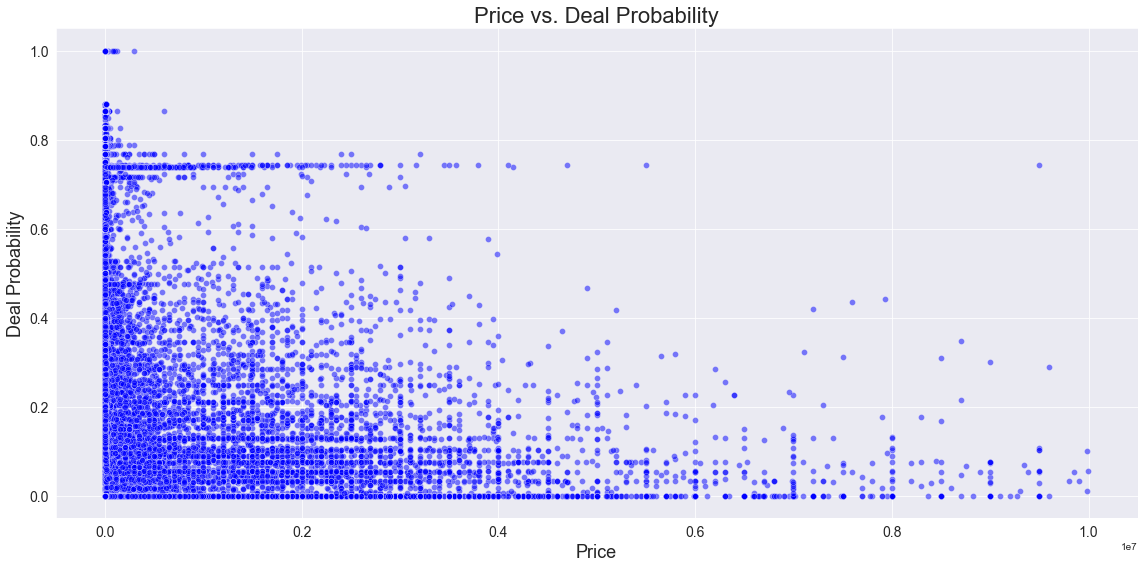

In [21]:
def plot_numerical_feature(data, x, y, title, xlabel, ylabel, figsize=(16, 8), rotation=None):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data, color='blue', alpha=0.5)
    plt.title(title, fontsize=22)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.show()

plot_numerical_feature(data[data['price'] < 10000000], 'price', 'deal_probability', 'Price vs. Deal Probability', 'Price', 'Deal Probability')

- There is a high density of ads with lower prices (left side of the plot).
- Many of these low-priced ads have varying deal probabilities
- A few ads with low prices have a deal probability close to 1
- There is a line of ads with around 0.78 deal probability that have prices between 0 and 3,000,000, which could indicate a specific category of ads or a specific users group.
- As the price increases, the density of ads decreases, and the deal probability tends to be lower.
- There are a few outliers where some high-priced ads have achieved moderate deal probabilities.

#### Region vs. Deal Probability

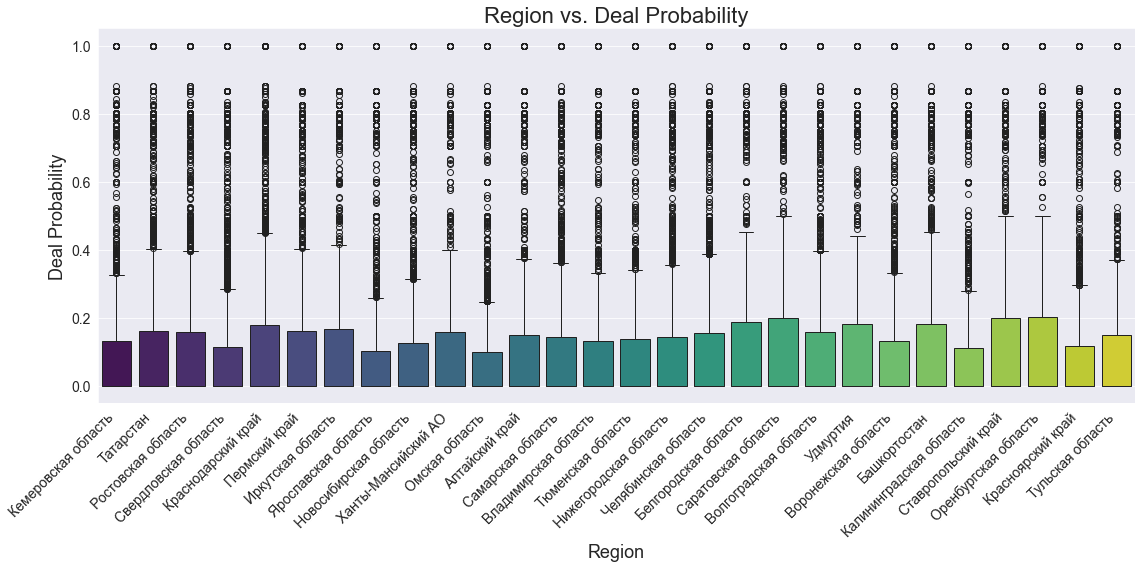

In [24]:
# box plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='region', y='deal_probability', data=data, palette='viridis', hue='region')
plt.title('Region vs. Deal Probability', fontsize=22)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Deal Probability', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- The box plot shows the distribution of deal probabilities for each region.
- The deal probabilities are relatively consistent across different regions, with some regions having slightly higher or lower deal probabilities.

#### User Type and Parent Category vs. Deal Probability

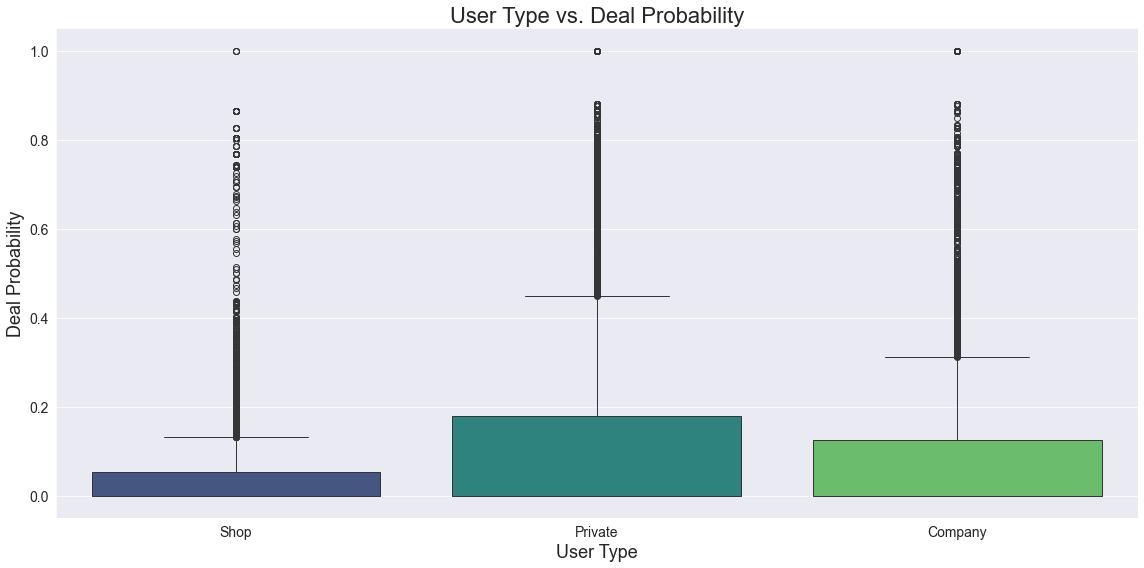

In [29]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='user_type', y='deal_probability', data=data, palette='viridis', hue='user_type')
plt.title('User Type vs. Deal Probability', fontsize=22)
plt.xlabel('User Type', fontsize=18)
plt.ylabel('Deal Probability', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- The box plot shows the distribution of deal probabilities for each user type.
- The deal probabilities are relatively consistent across different user types, with private users having slightly higher deal probabilities than companies and shops.
- Shops have the lowest median deal probability, while private users have the highest median deal probability.

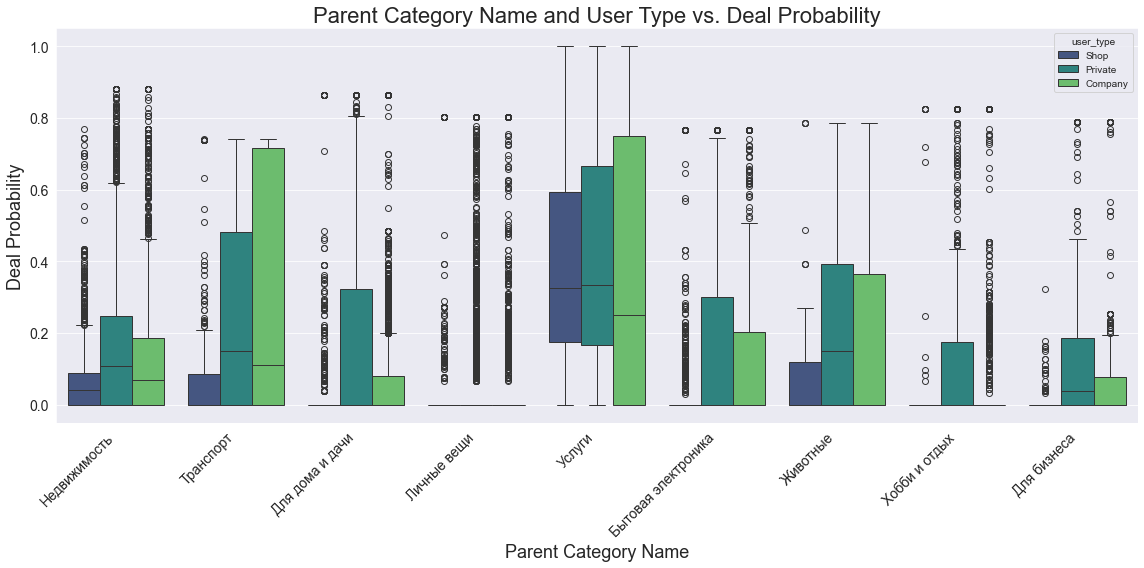

In [30]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='parent_category_name', y='deal_probability', data=data, palette='viridis', hue='user_type')
plt.title('Parent Category Name and User Type vs. Deal Probability', fontsize=22)
plt.xlabel('Parent Category Name', fontsize=18)
plt.ylabel('Deal Probability', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- The box plot shows the distribution of deal probabilities for each parent category and user type.
- Deal probabilities for services are the highest, followed by transport and animals.
- Shop users are present only in 4 parent categories: 'Real estate', 'Transport', 'Animals', and 'Services'.

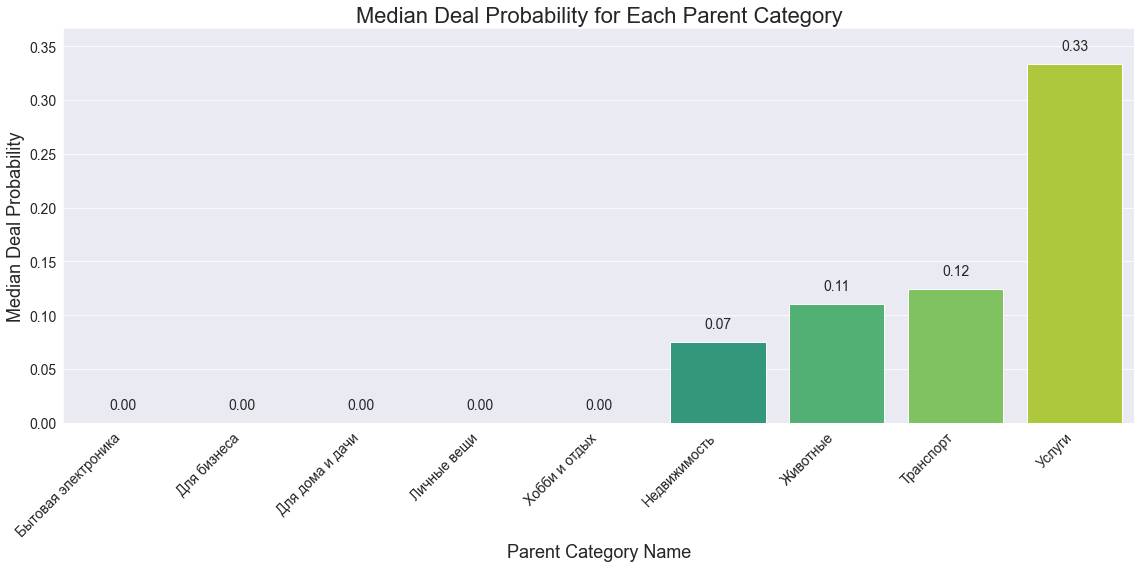

In [36]:
# median deal probability for each parent category
median_deal_probability = data.groupby('parent_category_name')['deal_probability'].median().sort_values()

plt.figure(figsize=(16, 8))
sns.barplot(x=median_deal_probability.index, y=median_deal_probability.values, palette='viridis', hue=median_deal_probability.index)
plt.title('Median Deal Probability for Each Parent Category', fontsize=22)
plt.xlabel('Parent Category Name', fontsize=18)
plt.ylabel('Median Deal Probability', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, max(median_deal_probability) * 1.1)

for i in range(len(median_deal_probability)):
    value = median_deal_probability.iloc[i]
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

- The bar plot shows the median deal probability for each parent category.
- The median deal probability is highest for the 'Services' category, followed by 'Transport', 'Animals' and 'Real estate'.

### Title and Description length vs. Deal Probability

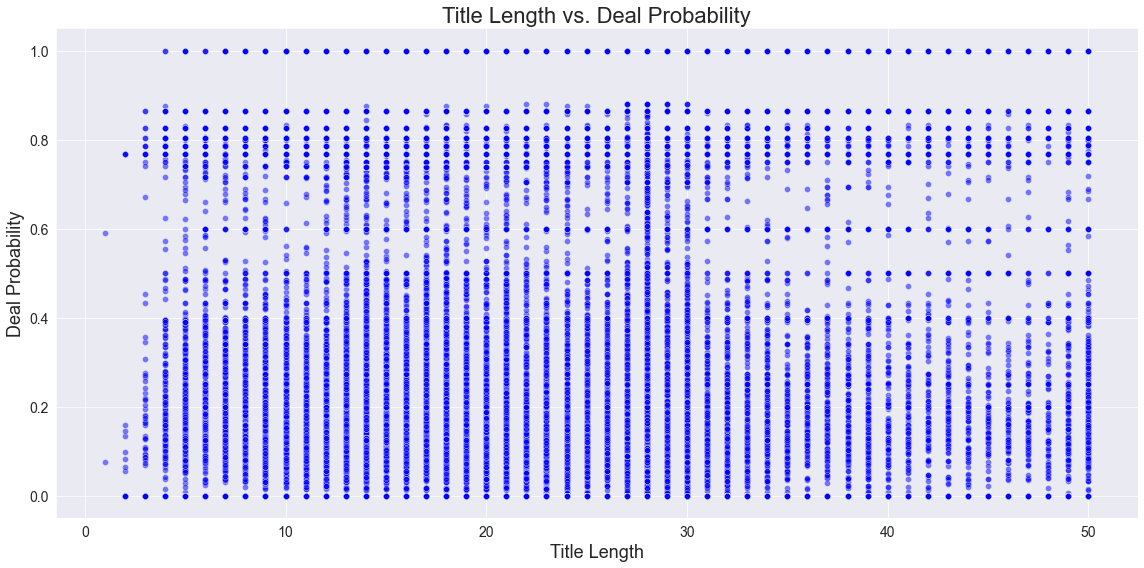

In [33]:
title_length = data['title'].str.len()
description_length = data['description'].dropna().str.len()

plot_numerical_feature(data, title_length, 'deal_probability', 'Title Length vs. Deal Probability', 'Title Length', 'Deal Probability')

The scatter plot shows that the deal probability is relatively consistent across different title lengths, indicating that the title length may not be a significant factor in predicting the deal probability.

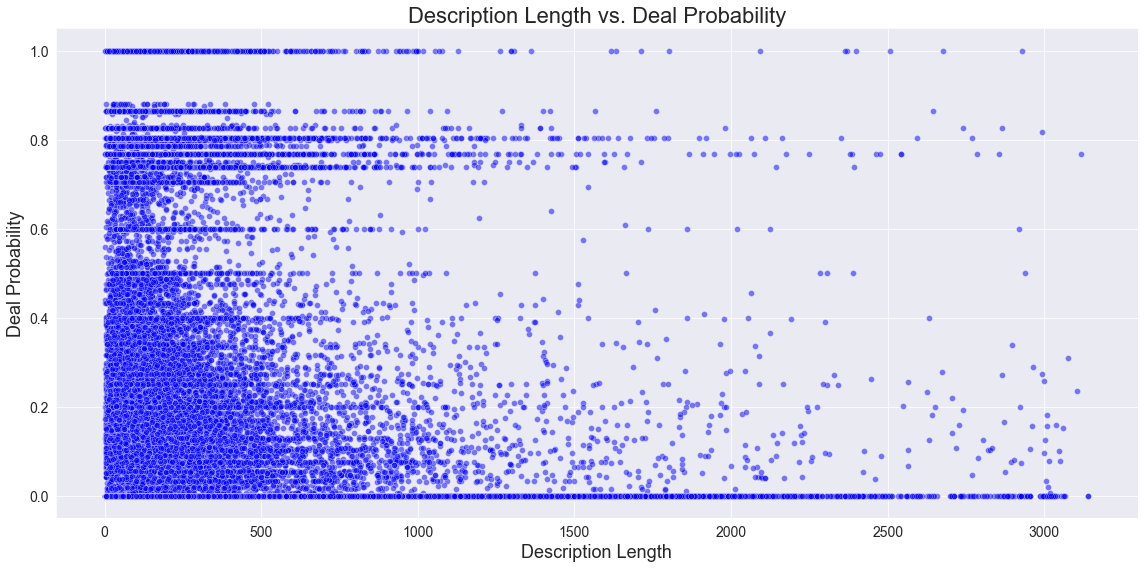

In [34]:
plot_numerical_feature(data, description_length, 'deal_probability', 'Description Length vs. Deal Probability', 'Description Length', 'Deal Probability')

The range of deal probabilities does not seem to change significantly with the description length, indicating that the description length may not be a significant factor in predicting the deal probability.

### Day of the Week vs. Deal Probability

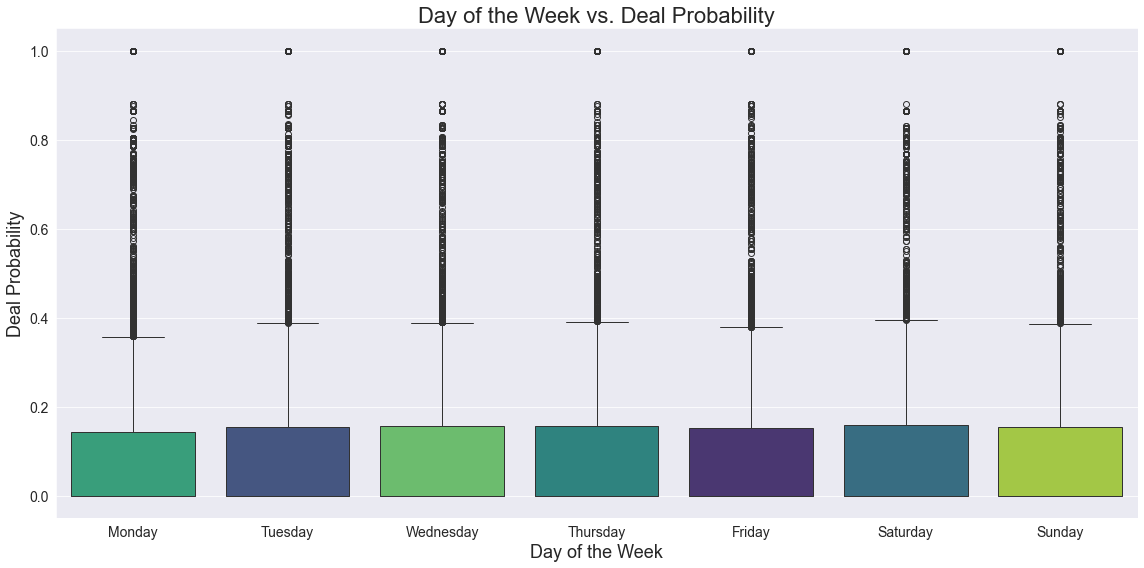

In [39]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='day_of_week', y='deal_probability', data=data_date, palette='viridis', hue='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of the Week vs. Deal Probability', fontsize=22)
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Deal Probability', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- The box plot shows the distribution of deal probabilities for each day of the week.
- The deal probabilities are very consistent across different days of the week, with no significant differences.

#### Top param values in high deal probability ads (>0.8) and low deal probability ads (<=0.2)

In [56]:
high_deal_probability = data[data['deal_probability'] > 0.8]
low_deal_probability = data[data['deal_probability'] <= 0.2]

top_param_1_high = high_deal_probability['param_1'].value_counts(normalize=True).head(10)
top_param_2_high = high_deal_probability['param_2'].value_counts(normalize=True).head(10)
top_param_3_high = high_deal_probability['param_3'].value_counts(normalize=True).head(10)

top_param_1_low = low_deal_probability['param_1'].value_counts(normalize=True).head(10)
top_param_2_low = low_deal_probability['param_2'].value_counts(normalize=True).head(10)
top_param_3_low = low_deal_probability['param_3'].value_counts(normalize=True).head(10)

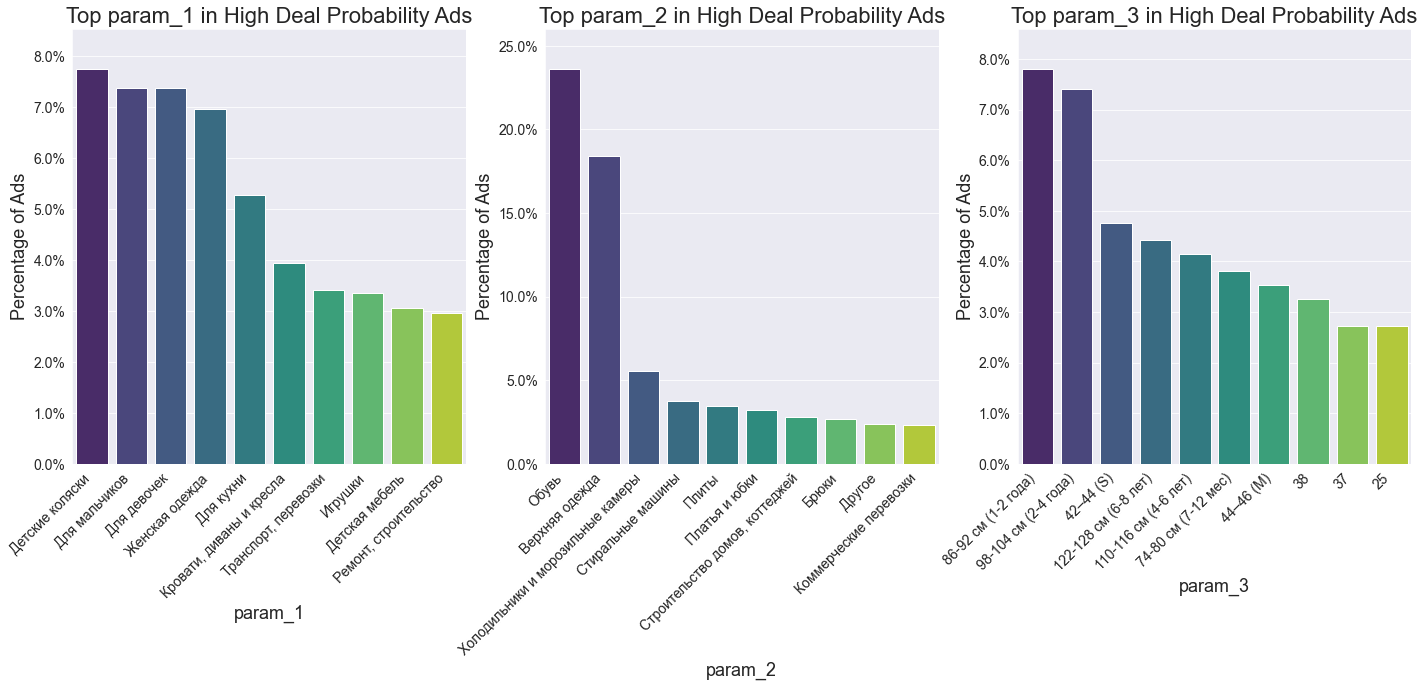

In [57]:
# plot top param values in high deal probability ads
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

params = ['param_1', 'param_2', 'param_3']
top_params = [top_param_1_high, top_param_2_high, top_param_3_high]
bottom_params = [top_param_1_low, top_param_2_low, top_param_3_low]

for i in range(3):
    ax = axes[i]
    param = params[i]
    top_param = top_params[i]
    bottom_param = bottom_params[i]

    sns.barplot(x=top_param.index, y=top_param.values, palette='viridis', ax=ax, hue=top_param.index)
    ax.set_title(f'Top {param} in High Deal Probability Ads', fontsize=22)
    ax.set_xlabel(param, fontsize=18)
    ax.set_ylabel('Percentage of Ads', fontsize=18)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(top_param.index, rotation=45, ha='right', fontsize=14)
    ax.set_yticklabels([f'{value:.1%}' for value in ax.get_yticks()], fontsize=14)
    ax.set_ylim(0, max(top_param) * 1.1)

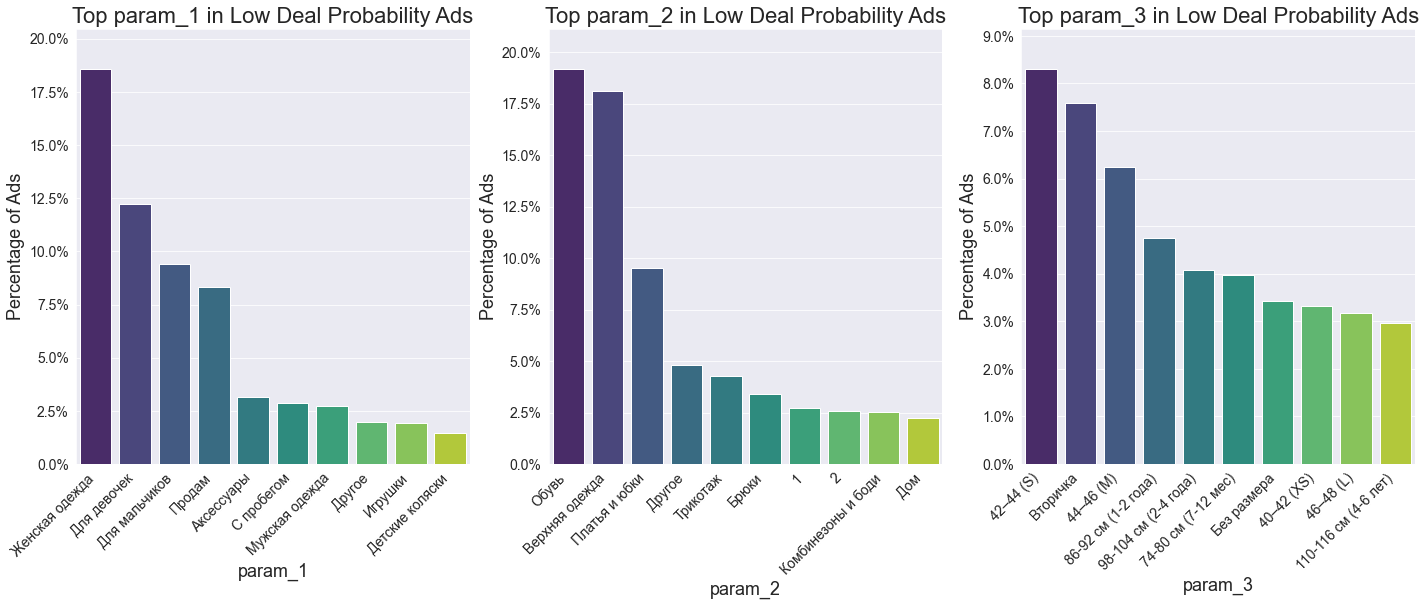

In [58]:
# plot top param values in low deal probability ads
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for i in range(3):
    ax = axes[i]
    param = params[i]
    top_param = top_params[i]
    bottom_param = bottom_params[i]

    sns.barplot(x=bottom_param.index, y=bottom_param.values, palette='viridis', ax=ax, hue=bottom_param.index)
    ax.set_title(f'Top {param} in Low Deal Probability Ads', fontsize=22)
    ax.set_xlabel(param, fontsize=18)
    ax.set_ylabel('Percentage of Ads', fontsize=18)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(bottom_param.index, rotation=45, ha='right', fontsize=14)
    ax.set_yticklabels([f'{value:.1%}' for value in ax.get_yticks()], fontsize=14)
    ax.set_ylim(0, max(bottom_param) * 1.1)

- The bar plots show the top values of `param_1`, `param_2`, and `param_3` in high deal probability ads (>0.8) and low deal probability ads (<=0.2).
- In high deal probability ads, the top values of `param_1`, `param_2`, and `param_3` are quite similar to low deal probability ads, indicating that these parameters may not be significant factors in predicting deal probability.

#### User Type and Parent Category vs Price

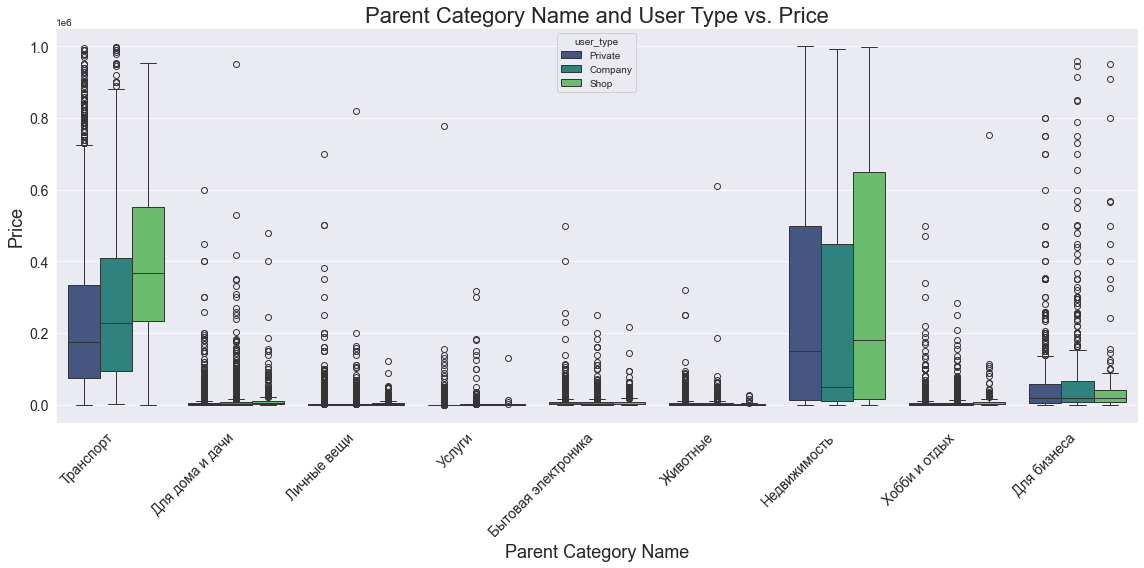

In [107]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='parent_category_name', y='price', data=data[data['price'] < 1000000], palette='viridis', hue='user_type')
plt.title('Parent Category Name and User Type vs. Price', fontsize=22)
plt.xlabel('Parent Category Name', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- The box plot shows the distribution of prices for each parent category and user type.
- As expected, the 'Real estate' category has the highest prices, followed by 'Transport' and 'For buisness'.

## Correlation Analysis

In [87]:
data_for_corr = data.copy()

First, let's add more numerical features to the dataset, such as the length of the title and description, and the number of words in the title and description. We will also treat image_top_1 as a numerical feature, even though it is a categorical feature.

In [88]:
data_for_corr['title_length'] = data_for_corr['title'].str.len()
data_for_corr['description_length'] = data_for_corr['description'].fillna('').str.len()
data_for_corr['title_words'] = data_for_corr['title'].str.split().apply(len)
data_for_corr['description_words'] = data_for_corr['description'].fillna('').str.split().apply(len)
data_for_corr['day_of_week'] = data_for_corr['activation_date'].dt.dayofweek
data_for_corr['day_of_month'] = data_for_corr['activation_date'].dt.day
data_for_corr['weekday'] = data_for_corr['day_of_week'].apply(lambda x: 1 if x < 5 else 0)
data_for_corr['image_top_1'] = data_for_corr['image_top_1'].fillna(data_for_corr['image_top_1'].max() + 1)
data_for_corr['params_length'] = (data_for_corr['param_1'].str.len() + data_for_corr['param_2'].str.len() + data_for_corr['param_3'].str.len()).fillna(0)

In [89]:
data_for_corr = data_for_corr.drop(['item_id', 'user_id', 'activation_date', 'title', 'description', 'region', 'city', 'parent_category_name', 'category_name', 'user_type', 'param_1', 'param_2', 'param_3'], axis=1)

data_for_corr.head()

price  item_seq_number  image_top_1  deal_probability  title_length  \
0  3500000.0              906        948.0           0.00000            28   
1   315000.0               24       1132.0           0.00000            16   
2     3000.0                3       1432.0           0.22491             5   
3      500.0               13         47.0           0.00000            29   
4      500.0              308       3067.0           0.37500            16   

   description_length  title_words  description_words  day_of_week  \
0                 199            7                 26            4   
1                 164            3                 26            4   
2                   0            1                  0            1   
3                  82            5                 10            1   
4                  30            2                  5            5   

   day_of_month  weekday  params_length  
0            17        1            0.0  
1            17        1           19.0  
2            28        1            0.0  
3            21        1           20.0  
4            25        0            0.0

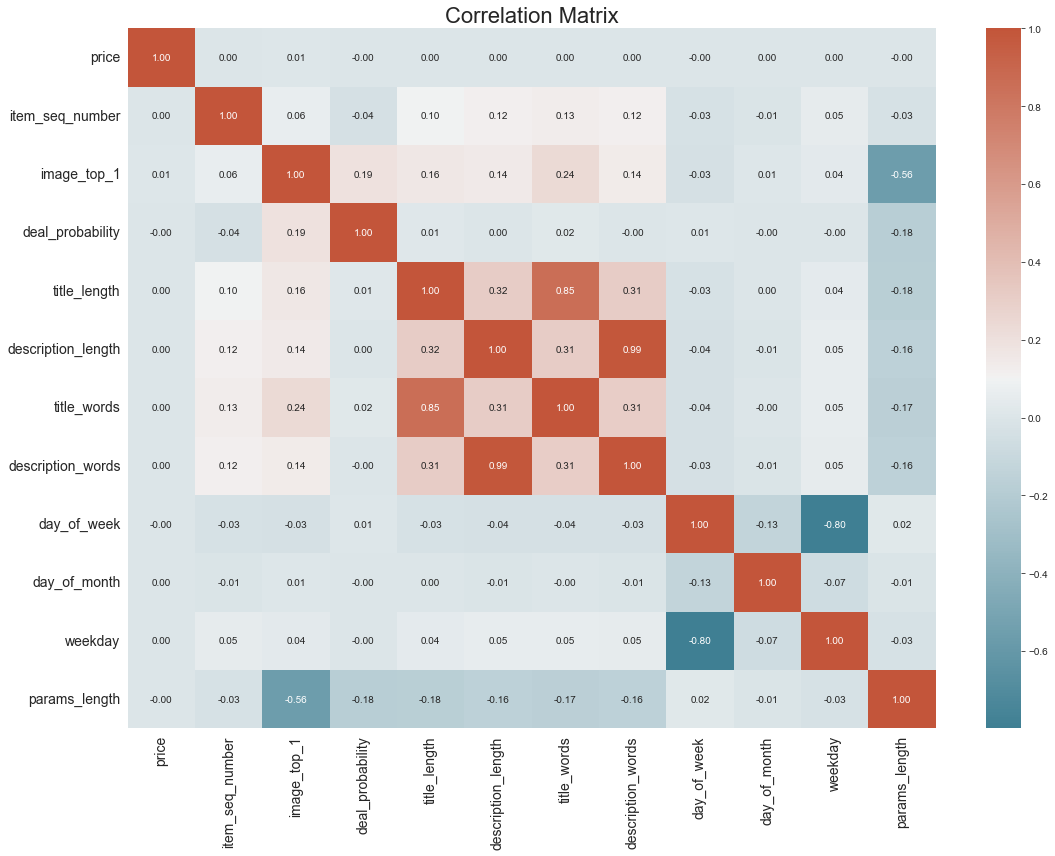

In [90]:
plt.figure(figsize=(16, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data_for_corr.corr(), annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

- The correlation matrix shows the correlation coefficients between numerical features in the dataset.
- There is a correlation between the length of the title and the length of the description, as well as between the number of words in the title and the number of words in the description.
- Surprisingly, there is a correlation between image_top_1 and deal_probability, which could indicate that the image classification code may have some influence on the deal probability and may have some order in it, but it was supposed to be a categorical nominal feature. We may try to use it as a numerical feature in the model instead of encoding it.
- There is also a large negative correlation between image_top_1 and params_length, which could indicate that parameters are somehow related to the image classification code.
- Other then that, there are no significant correlations between deal_probability and other numerical features.

# Missing values

In [91]:
print(f'Missing values in the dataset: {data.isnull().sum().sum()}')

Missing values in the dataset: 126149


C:\Users\Threeteck\AppData\Local\Temp\ipykernel_4992\2923452977.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


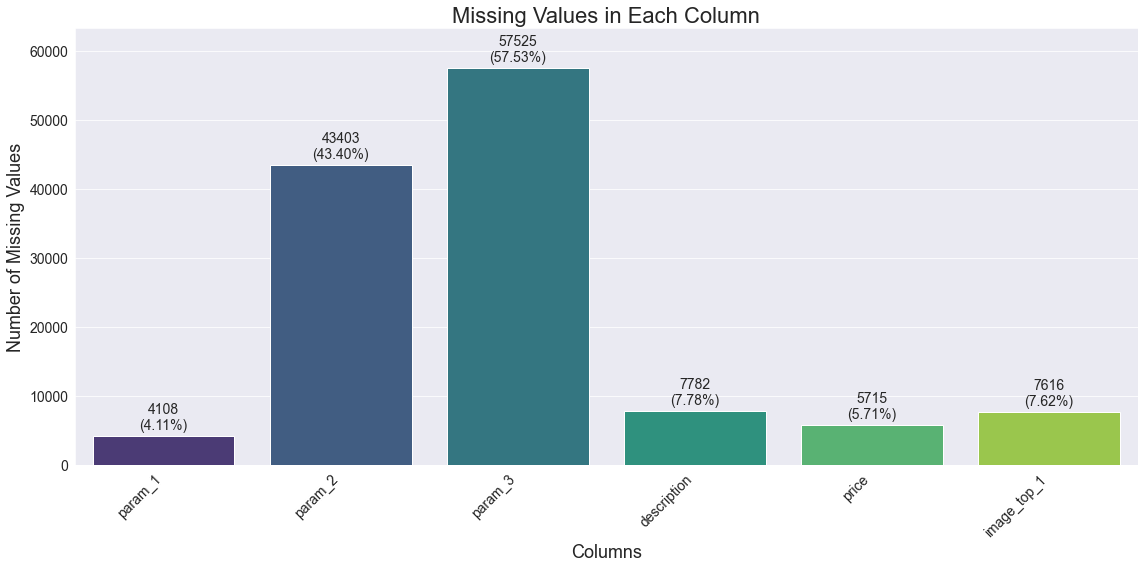

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

total_entries = len(data)
missing_percentages = (missing_values / total_entries) * 100

plt.figure(figsize=(16, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values in Each Column', fontsize=22)
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Number of Missing Values', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, max(missing_values) * 1.1)

for i in range(len(missing_values)):
    count = missing_values.iloc[i]
    percentage = missing_percentages.iloc[i]
    plt.text(i, count + max(missing_values) * 0.01, f'{count}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

Based on the plot above, we can see that there are missing values in the following columns:
1. **Optional parameters from Avito's ad model: `param_1`, `param_2`, `param_3`**
   - The columns `param_1`, `param_2`, and `param_3` have a large number of missing values, However, since these columns are optional parameters according to the dataset description, the high number of missing values is expected. Moreover, these parameters are categorical, so we can handle missing values by imputing them as a separate category.

2. **Missing Values in `description` and `price`**:
   - The `description` column has 8% missing entries. This is critical because the description is one of the key factors that can influence buyer interest. Missing descriptions could lead to lower prediction accuracy. We will impute these missing values with a placeholder text, such as "No description available."
   - The `price` column has 6% missing entries. Price is another important factor for demand prediction. We can impute these missing values with the median price within each category to maintain the distribution of prices within similar ads.

3. **Missing Values in `image_top_1`**:
   - The `image_top_1` column, which represents Avito's classification code for the image, has 8% missing entries. Since images are a significant part of the listing, missing this data could affect the prediction accuracy. Missing value may indicate that Avito's classification algorithm failed to classify the image. We will impute these missing values with a value that is not present in the dataset to distinguish them from the actual values.

#### Imputing param_1, param_2, and param_3

In [101]:
data['param_1'] = data['param_1'].fillna('missing')
data['param_2'] = data['param_2'].fillna('missing')
data['param_3'] = data['param_3'].fillna('missing')

#### Imputing description

In [102]:
data['description'] = data['description'].fillna('Нет описания')

#### Imputing price

In [104]:
category_price_median = data.groupby('category_name')['price'].median()
category_price_median.head()

category_name
Автомобили              230000.0
Аквариум                   500.0
Аудио и видео             2000.0
Билеты и путешествия      7500.0
Бытовая техника           3000.0
Name: price, dtype: float64

In [105]:
data['price'] = data['price'].fillna(data['category_name'].map(category_price_median))

#### Imputing image_top_1

In [108]:
max_image_top_1 = data['image_top_1'].max()
max_image_top_1

3066.0

In [109]:
data['image_top_1'] = data['image_top_1'].fillna(max_image_top_1 + 1)

In [110]:
print(f'Missing values in the dataset: {data.isnull().sum().sum()}')

Missing values in the dataset: 0


# Feature transformation and encoding

### Encoding Categorical Features

We will encode all categorical features using one-hot encoding. We will also encode the `image_top_1` feature as a numerical feature, as it may have some order in it.

But first, we need to collapse some of the unique values in the categorical features that have a large number of unique values. We will combine all values that have less than 75% of ads into one category called "Other".

In [138]:
data_encoded = data.copy()

top_categories = data_encoded['category_name'].value_counts(normalize=True).cumsum()
top_categories = top_categories[top_categories <= 0.75].index
data_encoded['category_name'] = data_encoded['category_name'].apply(lambda x: x if x in top_categories else 'Other')

top_cities = data_encoded['city'].value_counts(normalize=True).cumsum()
top_cities = top_cities[top_cities <= 0.75].index
data_encoded['city'] = data_encoded['city'].apply(lambda x: x if x in top_cities else 'Other')

top_param_1 = data_encoded['param_1'].value_counts(normalize=True).cumsum()
top_param_1 = top_param_1[top_param_1 <= 0.75].index
data_encoded['param_1'] = data_encoded['param_1'].apply(lambda x: x if x in top_param_1 or x == 'missing' else 'Other')

top_param_2 = data_encoded['param_2'].value_counts(normalize=True).cumsum()
top_param_2 = top_param_2[top_param_2 <= 0.75].index
data_encoded['param_2'] = data_encoded['param_2'].apply(lambda x: x if x in top_param_2 or x == 'missing' else 'Other')

top_param_3 = data_encoded['param_3'].value_counts(normalize=True).cumsum()
top_param_3 = top_param_3[top_param_3 <= 0.75].index
data_encoded['param_3'] = data_encoded['param_3'].apply(lambda x: x if x in top_param_3 or x == 'missing' else 'Other')

Now, we will encode the categorical features using one-hot encoding.

In [139]:
def params_length(x):
    if x == 'missing':
        return 0
    return len(x)
data_encoded['params_length'] = data_encoded['param_1'].apply(params_length) + data_encoded['param_2'].apply(params_length) + data_encoded['param_3'].apply(params_length)

In [140]:
categorical_cols = ['region', 'category_name', 'city', 'parent_category_name', 'user_type', 'param_1', 'param_2', 'param_3']
data_encoded = pd.get_dummies(data_encoded, columns=categorical_cols, drop_first=True, dtype=int)
data_encoded.head()

item_id       user_id                          title  \
0  37caa97a8562  5484477d3189   Дача 75 м² на участке 8 сот.   
1  85119a2796ec  46e13871e15c               Opel Astra, 2008   
2  fbd0db66bb86  b1c2c89ecd02                          Диван   
3  a91f1779fc3f  65bf5e16c85b  Ботинки Том.м мембрана 25 р-р   
4  83db89fe1827  e0b4ad32b616               Доставка букетов   

                                         description      price  \
0  Замечательная дача! Свежий дом и баня.  Все ст...  3500000.0   
1  Автомобиль в хорошем техническом состоянии, се...   315000.0   
2                                       Нет описания     3000.0   
3  Ботинки Том.м мембрана размер 25. На холодную ...      500.0   
4                     Любой букет 💐 доставим подарим      500.0   

   item_seq_number activation_date  image_top_1  deal_probability  \
0              906      2017-03-17        948.0           0.00000   
1               24      2017-03-17       1132.0           0.00000   
2                3      2017-03-28       1432.0           0.22491   
3               13      2017-03-21         47.0           0.00000   
4              308      2017-03-25       3067.0           0.37500   

   params_length  ...  param_2_Трикотаж  param_3_42–44 (S)  param_3_44–46 (M)  \
0             11  ...                 0                  0                  0   
1             20  ...                 0                  0                  0   
2             24  ...                 0                  0                  0   
3             23  ...                 0                  0                  0   
4              5  ...                 0                  0                  0   

   param_3_74-80 см (7-12 мес)  param_3_86-92 см (1-2 года)  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   param_3_98-104 см (2-4 года)  param_3_Other  param_3_missing  \
0                             0              0                1   
1                             0              1                0   
2                             0              0                1   
3                             0              1                0   
4                             0              0                1   

   param_3_Без размера  param_3_Вторичка  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  

[5 rows x 146 columns]

Then, let's drop `item_id` and `user_id` columns, as they are unique identifiers and do not provide any useful information for the model. We will also drop `title` and `description` columns for now, but we will extract the length of the title and description as numerical features.

In [141]:
data_encoded = data_encoded.drop(['item_id', 'user_id'], axis=1)

In [142]:
data_encoded['title_length'] = data_encoded['title'].str.len()
data_encoded['description_length'] = data_encoded['description'].str.len()
data_encoded = data_encoded.drop(['title', 'description'], axis=1)

Finally, we will extract day of the week and day of the month from the activation date, since year is the same for all ads and there are only 3 weeks of data.

In [143]:
data_encoded['day_of_week'] = data_encoded['activation_date'].dt.dayofweek
data_encoded['day_of_month'] = data_encoded['activation_date'].dt.day
data_encoded = data_encoded.drop('activation_date', axis=1)

In [144]:
data_encoded.head()

price  item_seq_number  image_top_1  deal_probability  params_length  \
0  3500000.0              906        948.0           0.00000             11   
1   315000.0               24       1132.0           0.00000             20   
2     3000.0                3       1432.0           0.22491             24   
3      500.0               13         47.0           0.00000             23   
4      500.0              308       3067.0           0.37500              5   

   region_Башкортостан  region_Белгородская область  \
0                    0                            0   
1                    0                            0   
2                    0                            0   
3                    0                            0   
4                    0                            0   

   region_Владимирская область  region_Волгоградская область  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   region_Воронежская область  ...  param_3_86-92 см (1-2 года)  \
0                           0  ...                            0   
1                           0  ...                            0   
2                           0  ...                            0   
3                           0  ...                            0   
4                           0  ...                            0   

   param_3_98-104 см (2-4 года)  param_3_Other  param_3_missing  \
0                             0              0                1   
1                             0              1                0   
2                             0              0                1   
3                             0              1                0   
4                             0              0                1   

   param_3_Без размера  param_3_Вторичка  title_length  description_length  \
0                    0                 0            28                 199   
1                    0                 0            16                 164   
2                    0                 0             5                  12   
3                    0                 0            29                  82   
4                    0                 0            16                  30   

   day_of_week  day_of_month  
0            4            17  
1            4            17  
2            1            28  
3            1            21  
4            5            25  

[5 rows x 145 columns]

## Feature Scaling

Now, we will scale the numerical features in the dataset using the Min-Max scaler to ensure that all features are on the same scale. But first, we need to split the data into training and testing sets.

In [151]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('deal_probability', axis=1)
y = data_encoded['deal_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
data_encoded.describe()

price  item_seq_number   image_top_1  deal_probability  \
count  1.000000e+05     100000.00000  100000.00000     100000.000000   
mean   1.044991e+06        721.18639    1382.37812          0.140226   
std    2.514185e+08       5422.25495    1049.85461          0.261250   
min    0.000000e+00          1.00000       0.00000          0.000000   
25%    5.000000e+02          9.00000     468.00000          0.000000   
50%    1.300000e+03         28.00000    1165.00000          0.000000   
75%    7.000000e+03         89.00000    2267.00000          0.152972   
max    7.950101e+10     204033.00000    3067.00000          1.000000   

       params_length  region_Башкортостан  region_Белгородская область  \
count  100000.000000        100000.000000                100000.000000   
mean       16.928550             0.045470                     0.019000   
std        11.556667             0.208334                     0.136525   
min         0.000000             0.000000                     0.000000   
25%         5.000000             0.000000                     0.000000   
50%        15.000000             0.000000                     0.000000   
75%        24.000000             0.000000                     0.000000   
max        47.000000             1.000000                     1.000000   

       region_Владимирская область  region_Волгоградская область  \
count                100000.000000                 100000.000000   
mean                      0.017590                      0.033280   
std                       0.131456                      0.179368   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       0.000000                      0.000000   
75%                       0.000000                      0.000000   
max                       1.000000                      1.000000   

       region_Воронежская область  ...  param_3_86-92 см (1-2 года)  \
count               100000.000000  ...                100000.000000   
mean                     0.030120  ...                     0.019200   
std                      0.170918  ...                     0.137228   
min                      0.000000  ...                     0.000000   
25%                      0.000000  ...                     0.000000   
50%                      0.000000  ...                     0.000000   
75%                      0.000000  ...                     0.000000   
max                      1.000000  ...                     1.000000   

       param_3_98-104 см (2-4 года)  param_3_Other  param_3_missing  \
count                 100000.000000  100000.000000    100000.000000   
mean                       0.016600       0.258010         0.575250   
std                        0.127768       0.437542         0.494307   
min                        0.000000       0.000000         0.000000   
25%                        0.000000       0.000000         0.000000   
50%                        0.000000       0.000000         1.000000   
75%                        0.000000       1.000000         1.000000   
max                        1.000000       1.000000         1.000000   

       param_3_Без размера  param_3_Вторичка   title_length  \
count        100000.000000     100000.000000  100000.000000   
mean              0.013110          0.034340      21.405910   
std               0.113746          0.182102      10.977784   
min               0.000000          0.000000       1.000000   
25%               0.000000          0.000000      13.000000   
50%               0.000000          0.000000      20.000000   
75%               0.000000          0.000000      28.000000   
max               1.000000          1.000000      50.000000   

       description_length    day_of_week   day_of_month  
count       100000.000000  100000.000000  100000.000000  
mean           179.899320       2.933720      21.540340  
std            291.270287       2.028563       4.057489  
min  

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['price', 'item_seq_number', 'image_top_1', 'title_length', 'description_length', 'params_length', 'day_of_week', 'day_of_month']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_train.head()

price  item_seq_number  image_top_1  params_length  \
75220  1.257846e-08         0.000093     0.075318       0.106383   
48955  8.175997e-09         0.000034     0.788719       0.106383   
44966  6.918151e-07         0.000270     0.371047       0.212766   
13568  6.289228e-09         0.000098     1.000000       0.553191   
92727  1.760984e-07         0.001529     1.000000       0.000000   

       region_Башкортостан  region_Белгородская область  \
75220                    0                            0   
48955                    0                            0   
44966                    0                            0   
13568                    1                            0   
92727                    0                            0   

       region_Владимирская область  region_Волгоградская область  \
75220                            0                             0   
48955                            0                             0   
44966                            0                             0   
13568                            0                             0   
92727                            0                             0   

       region_Воронежская область  region_Иркутская область  ...  \
75220                           0                         0  ...   
48955                           0                         0  ...   
44966                           0                         0  ...   
13568                           0                         0  ...   
92727                           0                         0  ...   

       param_3_86-92 см (1-2 года)  param_3_98-104 см (2-4 года)  \
75220                            0                             0   
48955                            0                             0   
44966                            0                             0   
13568                            0                             0   
92727                            0                             0   

       param_3_Other  param_3_missing  param_3_Без размера  param_3_Вторичка  \
75220              0                1                    0                 0   
48955              0                1                    0                 0   
44966              0                1                    0                 0   
13568              0                1                    0                 0   
92727              0                1                    0                 0   

       title_length  description_length  day_of_week  day_of_month  
75220      0.693878            0.013376     0.000000      0.357143  
48955      0.102041            0.010510     0.833333      0.714286  
44966      0.285714            0.186306     0.500000      0.571429  
13568      0.693878            0.044268     0.000000      0.357143  
92727      0.571429            0.011465     0.333333      0.000000  

[5 rows x 144 columns]

# Proof of Concept model

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.4f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')

Root Mean Squared Error: 0.2408
R2 Score: 0.1543


The result is already quite good, since RMSE of 0.24 means that the model's predictions are on average 0.24 away from the true values. The R2 score of 0.15 indicates that the model explains 15% of the variance in the target variable, which is not bad for a simple linear regression model. Moreover, best solution for this dataset archives RMSE of 0.21, so we are quite close to it.

# Great Expectations

Now let's validate the data using Great Expectations. We will create a new Great Expectations project and validate the raw data.

In [193]:
from great_expectations.data_context import FileDataContext

FileDataContext(project_root_dir = "../services")

{
  "anonymous_usage_statistics": {
    "enabled": true,
    "data_context_id": "7e2012ba-810b-41b0-930d-07c6c4ea875f",
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "explicit_id": true,
    "explicit_url": false
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {},
  "include_rendered_content": {
    "globally": false

In [194]:
import great_expectations as gx

context = gx.get_context(project_root_dir = "../services")

In [195]:
df = pd.read_csv("../data/train100k.csv", parse_dates=["activation_date"])

ds = context.sources.add_or_update_pandas(name = "pandas_datasource")
ds

PandasDatasource(type='pandas', name='pandas_datasource', id=None, assets=[])

In [196]:
da = ds.add_dataframe_asset(name = "train100k")
da

DataFrameAsset(name='train100k', type='dataframe', id=None, order_by=[], batch_metadata={})

In [197]:
batch_request = da.build_batch_request(dataframe = df)
batch_request

BatchRequest(datasource_name='pandas_datasource', data_asset_name='train100k', options={})

In [198]:
batches = da.get_batch_list_from_batch_request(batch_request)
batches[0].head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

        item_id       user_id                region              city  \
0  37caa97a8562  5484477d3189   Кемеровская область       Новокузнецк   
1  85119a2796ec  46e13871e15c             Татарстан  Набережные Челны   
2  fbd0db66bb86  b1c2c89ecd02    Ростовская область    Ростов-на-Дону   
3  a91f1779fc3f  65bf5e16c85b  Свердловская область      Екатеринбург   
4  83db89fe1827  e0b4ad32b616    Краснодарский край     Варениковская   

  parent_category_name           category_name                   param_1  \
0         Недвижимость    Дома, дачи, коттеджи                    Продам   
1            Транспорт              Автомобили                С пробегом   
2      Для дома и дачи       Мебель и интерьер  Кровати, диваны и кресла   
3          Личные вещи  Детская одежда и обувь             Для мальчиков   
4               Услуги       Предложение услуг      Курьерские поручения   

  param_2 param_3                          title  \
0    Дача     NaN   Дача 75 м² на участке 8 сот.   


## Data Expectations:
- **Region**
    - There are 28 unique regions in the dataset.
    - The region column should not have any missing values.
    - The region column should be of type string.
- **City**
    - The city column should not have any missing values.
    - The city column should be of type string.
    *Note: We do not restrict the number of unique cities, as we can put unknown cities into 'Other' category.*
- **Parent Category Name**
    - There are 9 unique parent category names in the dataset.
    - The parent category name column should not have any missing values.
    - The parent category name column should be of type string.
- **Category Name**
    - There are 47 unique category names in the dataset.
    - The category name column should not have any missing values.
    - The category name column should be of type string.
- **User Type**
    - There are 3 unique user types in the dataset.
    - The user type column should not have any missing values.
    - The user type column should be of type string.
- **Price**
    - The price column should be of type float.
    - The price column should not have any negative values.
- **Item Seq Number**
    - The item seq number column should be of type int.
    - The item seq number column should not have any negative values.
- **Image Top 1**
    - The image top 1 column should not have any negative values.
- **Param 1**
    - The param 1 column should be of type string.
- **Param 2**
    - The param 2 column should be of type string.
- **Param 3**
    - The param 3 column should be of type string.
- **Title**
    - The title column should be of type string.
    - The title column should not have any missing values.
    - The title column should not have any empty strings.
    - The title column should have a maximum length of 50 characters.
- **Description**
    - The description column should be of type string.
- **Deal Probability**
    - The deal probability column should be of type float.
    - The deal probability column should have values between 0 and 1.
    - The deal probability column should not have any missing values.
- **Activation Date**
    - The activation date column should be of type datetime.
    - The activation date column should not have any missing values.
- **Image**
    - The image column should be of type string.
- **Item Id**
    - The item id column should be of type string.
    - The item id column should be unique.
    - The item id column should not have any missing values.
- **User Id**
    - The user id column should be of type string.
    - The user id column should not have any missing values.

In [199]:
context.add_or_update_expectation_suite("initial_data_validation")
context.list_expectation_suites()

[ExpectationSuiteIdentifier::initial_data_validation]

In [200]:
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="initial_data_validation"
)

validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

item_id       user_id                region              city  \
0  37caa97a8562  5484477d3189   Кемеровская область       Новокузнецк   
1  85119a2796ec  46e13871e15c             Татарстан  Набережные Челны   
2  fbd0db66bb86  b1c2c89ecd02    Ростовская область    Ростов-на-Дону   
3  a91f1779fc3f  65bf5e16c85b  Свердловская область      Екатеринбург   
4  83db89fe1827  e0b4ad32b616    Краснодарский край     Варениковская   

  parent_category_name           category_name                   param_1  \
0         Недвижимость    Дома, дачи, коттеджи                    Продам   
1            Транспорт              Автомобили                С пробегом   
2      Для дома и дачи       Мебель и интерьер  Кровати, диваны и кресла   
3          Личные вещи  Детская одежда и обувь             Для мальчиков   
4               Услуги       Предложение услуг      Курьерские поручения   

  param_2 param_3                          title  \
0    Дача     NaN   Дача 75 м² на участке 8 сот.   
1    Opel   Astra               Opel Astra, 2008   
2     NaN     NaN                          Диван   
3   Обувь      25  Ботинки Том.м мембрана 25 р-р   
4     NaN     NaN               Доставка букетов   

                                         description      price  \
0  Замечательная дача! Свежий дом и баня.  Все ст...  3500000.0   
1  Автомобиль в хорошем техническом состоянии, се...   315000.0   
2                                                NaN     3000.0   
3  Ботинки Том.м мембрана размер 25. На холодную ...      500.0   
4                     Любой букет 💐 доставим подарим      500.0   

   item_seq_number activation_date user_type  \
0              906      2017-03-17      Shop   
1               24      2017-03-17   Private   
2                3      2017-03-28   Private   
3               13      2017-03-21   Private   
4              308      2017-03-25   Company   

                                               image  image_top_1  \
0  9fdf936006ed83f6fe42effecfa046495cf640fca430d2...        948.0   
1  3d7b1a4a4c24a23452cb1079d947080b530e0f56f637fc...       1132.0   
2  d049cf9af1cd96426cc5c27afca408210f4f82543689bc...       1432.0   
3  822926bc330eb36899870c496fc77780ff602365d49f35...         47.0   
4                                                NaN          NaN   

   deal_probability  
0           0.00000  
1           0.00000  
2           0.22491  
3           0.00000  
4           0.37500

In [201]:
ex1 = validator.expect_column_values_to_not_be_null(column="region", meta={"dimension": "Completeness"})
ex2 = validator.expect_column_unique_value_count_to_be_between(column="region", min_value=28, max_value=28, meta={"dimension": "Cardinality"})
ex3 = validator.expect_column_values_to_be_of_type(column="region", type_="object", meta={"dimension": "Datatype"})

ex4 = validator.expect_column_values_to_not_be_null(column="city", meta={"dimension": "Completeness"})
ex5 = validator.expect_column_values_to_be_of_type(column="city", type_="object", meta={"dimension": "Datatype"})

ex6 = validator.expect_column_values_to_not_be_null(column="parent_category_name", meta={"dimension": "Completeness"})
ex7 = validator.expect_column_unique_value_count_to_be_between(column="parent_category_name", min_value=9, max_value=9, meta={"dimension": "Cardinality"})
ex8 = validator.expect_column_values_to_be_of_type(column="parent_category_name", type_="object", meta={"dimension": "Datatype"})

ex9 = validator.expect_column_values_to_not_be_null(column="category_name", meta={"dimension": "Completeness"})
ex10 = validator.expect_column_unique_value_count_to_be_between(column="category_name", min_value=47, max_value=47, meta={"dimension": "Cardinality"})
ex11 = validator.expect_column_values_to_be_of_type(column="category_name", type_="object", meta={"dimension": "Datatype"})

ex12 = validator.expect_column_values_to_not_be_null(column="user_type", meta={"dimension": "Completeness"})
ex13 = validator.expect_column_unique_value_count_to_be_between(column="user_type", min_value=3, max_value=3, meta={"dimension": "Cardinality"})
ex14 = validator.expect_column_values_to_be_of_type(column="user_type", type_="object", meta={"dimension": "Datatype"})

ex15 = validator.expect_column_values_to_be_of_type(column="price", type_="float64", meta={"dimension": "Datatype"})
ex16 = validator.expect_column_values_to_be_between(column="price", min_value=0, meta={"dimension": "Validity"})

ex17 = validator.expect_column_values_to_be_of_type(column="item_seq_number", type_="int64", meta={"dimension": "Datatype"})
ex18 = validator.expect_column_values_to_be_between(column="item_seq_number", min_value=0, meta={"dimension": "Validity"})

ex19 = validator.expect_column_values_to_be_of_type(column="image_top_1", type_="float64", meta={"dimension": "Datatype"})
ex20 = validator.expect_column_values_to_be_between(column="image_top_1", min_value=0, meta={"dimension": "Validity"})

ex21 = validator.expect_column_values_to_be_of_type(column="param_1", type_="object", meta={"dimension": "Datatype"})
ex22 = validator.expect_column_values_to_be_of_type(column="param_2", type_="object", meta={"dimension": "Datatype"})
ex23 = validator.expect_column_values_to_be_of_type(column="param_3", type_="object", meta={"dimension": "Datatype"})

ex24 = validator.expect_column_values_to_not_be_null(column="title", meta={"dimension": "Completeness"})
ex25 = validator.expect_column_values_to_be_of_type(column="title", type_="object", meta={"dimension": "Datatype"})
ex26 = validator.expect_column_value_lengths_to_be_between(column="title", max_value=50, meta={"dimension": "Validity"})
ex27 = validator.expect_column_values_to_not_match_regex(column="title", regex=r"^\s*$", meta={"dimension": "Validity"})

ex28 = validator.expect_column_values_to_be_of_type(column="description", type_="object", meta={"dimension": "Datatype"})

ex29 = validator.expect_column_values_to_be_of_type(column="deal_probability", type_="float64", meta={"dimension": "Datatype"})
ex30 = validator.expect_column_min_to_be_between(column="deal_probability", min_value=0, meta={"dimension": "Validity"})
ex31 = validator.expect_column_max_to_be_between(column="deal_probability", max_value=1, meta={"dimension": "Validity"})
ex32 = validator.expect_column_values_to_not_be_null(column="deal_probability", meta={"dimension": "Completeness"})

ex33 = validator.expect_column_values_to_be_of_type(column="activation_date", type_="datetime64[ns]", meta={"dimension": "Datatype"})
ex34 = validator.expect_column_values_to_not_be_null(column="activation_date", meta={"dimension": "Completeness"})

ex35 = validator.expect_column_values_to_be_of_type(column="image", type_="object", meta={"dimension": "Datatype"})

ex36 = validator.expect_column_values_to_be_of_type(column="item_id", type_="object", meta={"dimension": "Datatype"})
ex37 = validator.expect_column_values_to_be_unique(column="item_id", meta={"dimension": "Uniqueness"})
ex38 = validator.expect_column_values_to_not_be_null(column="item_id", meta={"dimension": "Completeness"})

ex39 = validator.expect_column_values_to_be_of_type(column="user_id", type_="object", meta={"dimension": "Datatype"})
ex40 = validator.expect_column_values_to_not_be_null(column="user_id", meta={"dimension": "Completeness"})

# Save the expectation suite
validator.save_expectation_suite(discard_failed_expectations=False)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/9 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

In [202]:
expectations = [
    ex1, ex2, ex3, ex4, ex5, ex6, ex7, ex8, ex9, ex10, ex11, ex12, ex13, ex14, ex15, ex16, ex17, ex18, ex19, ex20,
    ex21, ex22, ex23, ex24, ex25, ex26, ex27, ex28, ex29, ex30, ex31, ex32, ex33, ex34, ex35, ex36, ex37, ex38, ex39, ex40,
]

for i, expectation in enumerate(expectations):
    print(f"Expectation {i + 1}: {('Success' if expectation['success'] else 'Failed')}")

Expectation 1: Success
Expectation 2: Success
Expectation 3: Success
Expectation 4: Success
Expectation 5: Success
Expectation 6: Success
Expectation 7: Success
Expectation 8: Success
Expectation 9: Success
Expectation 10: Success
Expectation 11: Success
Expectation 12: Success
Expectation 13: Success
Expectation 14: Success
Expectation 15: Success
Expectation 16: Success
Expectation 17: Success
Expectation 18: Success
Expectation 19: Success
Expectation 20: Success
Expectation 21: Success
Expectation 22: Success
Expectation 23: Success
Expectation 24: Success
Expectation 25: Success
Expectation 26: Success
Expectation 27: Success
Expectation 28: Success
Expectation 29: Success
Expectation 30: Success
Expectation 31: Success
Expectation 32: Success
Expectation 33: Success
Expectation 34: Success
Expectation 35: Success
Expectation 36: Success
Expectation 37: Success
Expectation 38: Success
Expectation 39: Success
Expectation 40: Success


In [203]:
checkpoint = context.add_or_update_checkpoint(
    name = "initial_data_validation_checkpoint",
    validations=[
        {
            "batch_request": batch_request,
            "expectation_suite_name" : "initial_data_validation"
        }
    ]
)
checkpoint

{
  "action_list": [
    {
      "name": "store_validation_result",
      "action": {
        "class_name": "StoreValidationResultAction"
      }
    },
    {
      "name": "store_evaluation_params",
      "action": {
        "class_name": "StoreEvaluationParametersAction"
      }
    },
    {
      "name": "update_data_docs",
      "action": {
        "class_name": "UpdateDataDocsAction"
      }
    }
  ],
  "batch_request": {},
  "class_name": "Checkpoint",
  "config_version": 1.0,
  "evaluation_parameters": {},
  "module_name": "great_expectations.checkpoint",
  "name": "initial_data_validation_checkpoint",
  "profilers": [],
  "runtime_configuration": {},
  "validations": [
    {
      "expectation_suite_name": "initial_data_validation",
      "batch_request": {
        "datasource_name": "pandas_datasource",
        "data_asset_name": "train100k",
        "options": {}
      }
    }
  ]
}

In [204]:
checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/96 [00:00<?, ?it/s]

In [205]:
checkpoint_result.success

True

In [206]:
context.build_data_docs()

{'local_site': 'file://D:\\mlopsiu_team4\\notebooks\\..\\services\\gx\\uncommitted/data_docs/local_site/index.html'}

In [207]:
context.open_data_docs()